In [1]:
from tensorflow.keras import models, layers, Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_base = '../data/res_data/cross_val/base/'
path_novel2 = '../data/res_data/cross_val/novel/'
prob = []

In [3]:
import tensorflow as tf
gpu_id = 0
print(tf.__version__)
if tf.__version__ >= "2.1.0":
    physical_devices = tf.config.list_physical_devices('GPU')
    tf.config.list_physical_devices('GPU')
    tf.config.set_visible_devices(physical_devices[gpu_id], 'GPU')
    tf.config.experimental.set_memory_growth(physical_devices[gpu_id], True)
elif tf.__version__ >= "2.0.0":
    #TF2.0
    physical_devices = tf.config.experimental.list_physical_devices('GPU')
    tf.config.experimental.set_visible_devices(physical_devices[gpu_id], 'GPU')
    tf.config.experimental.set_memory_growth(physical_devices[gpu_id], True)
else:
    from keras.backend.tensorflow_backend import set_session
    config = tf.ConfigProto(
        gpu_options=tf.GPUOptions(
            visible_device_list=str(gpu_id), # specify GPU number
            allow_growth=True
        )
    )
    set_session(tf.Session(config=config))

2.3.1


2278 374
Found 2278 images belonging to 2 classes.
Found 374 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
71/71 [==============================] - 4s 57ms/step - loss: 0.3655 - accuracy: 0.8642 - val_loss: 1.4901 - val_accuracy: 0.5057
Epoch 2/10
71/71 [==============================] - 3s 39ms/step - loss: 0.3461 - accuracy: 0.9052 - val_loss: 4.4418 - val_accuracy: 0.4972
Epoch 3/10
71/71 [==============================] - 3s 39ms/step - loss: 0.1103 - accuracy: 0.9639 - val_loss: 0.7141 - val_accuracy: 0.4943
Epoch 4/10
71/71 [==============================] - 3s 39ms/step - loss: 0.0706 - accuracy: 0.9795 - val_loss: 0.6772 - val_accuracy: 0.4915
Epoch 5/10
71/71 [==============================] - 3s 39ms/step - loss: 0.1080 - accuracy: 0.9764 - val_loss: 0.6969 - val_accuracy: 0.4915
Epoch 6/10
71/71 [==============================] - 3s 39ms/step - loss: 0.2754 - accuracy: 0.9212 - val_loss: 0.6841 - val_acc

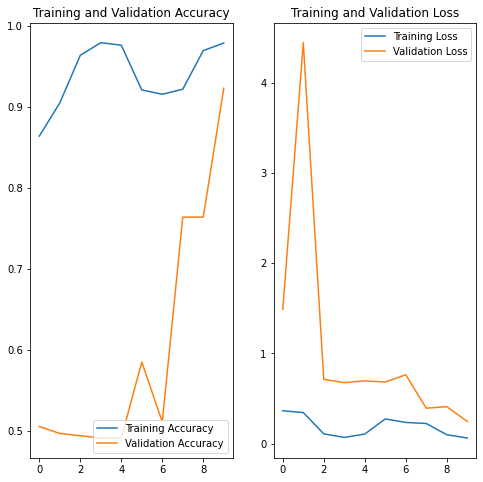

Found 1188 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
Epoch 1/10
37/37 [==============================] - 2s 47ms/step - loss: 1.0103 - accuracy: 0.6488 - val_loss: 1763.4667 - val_accuracy: 0.5000
Epoch 2/10
37/37 [==============================] - 1s 39ms/step - loss: 0.8739 - accuracy: 0.5510 - val_loss: 27.6201 - val_accuracy: 0.4896
Epoch 3/10
37/37 [==============================] - 1s 39ms/step - loss: 0.9010 - accuracy: 0.5182 - val_loss: 2.4000 - val_accuracy: 0.4844
Epoch 4/10
37/37 [==============================] - 1s 39ms/step - loss: 0.8078 - accuracy: 0.5147 - val_loss: 0.7257 - val_accuracy: 0.4948
Epoch 5/10
37/37 [==============================] - 1s 39ms/step - loss: 0.7444 - accuracy: 0.5225 - val_loss: 416.0316 - val_accuracy: 0.4844
Epoch 6/10
37/37 [==============================] - 1s 39ms/step - loss: 0.7634 - accuracy: 0.5078 - val_loss: 153.7289 - val_accuracy: 0.4896
Epoch 7/10
37/37 [==============================] - 1s 39ms/ste

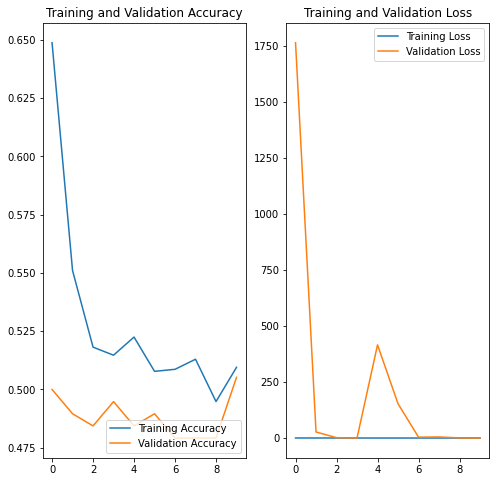

2278 374
Found 2278 images belonging to 2 classes.
Found 374 images belonging to 2 classes.
Epoch 1/10
71/71 [==============================] - 4s 53ms/step - loss: 0.4941 - accuracy: 0.8451 - val_loss: 0.8478 - val_accuracy: 0.4943
Epoch 2/10
71/71 [==============================] - 3s 39ms/step - loss: 0.1260 - accuracy: 0.9510 - val_loss: 0.7056 - val_accuracy: 0.5028
Epoch 3/10
71/71 [==============================] - 3s 39ms/step - loss: 0.0659 - accuracy: 0.9733 - val_loss: 0.6871 - val_accuracy: 0.5312
Epoch 4/10
71/71 [==============================] - 3s 40ms/step - loss: 0.3671 - accuracy: 0.8736 - val_loss: 56.0605 - val_accuracy: 0.4972
Epoch 5/10
71/71 [==============================] - 3s 39ms/step - loss: 0.1446 - accuracy: 0.9497 - val_loss: 0.6507 - val_accuracy: 0.6392
Epoch 6/10
71/71 [==============================] - 3s 39ms/step - loss: 0.1591 - accuracy: 0.9519 - val_loss: 1.3157 - val_accuracy: 0.5057
Epoch 7/10
71/71 [==============================] - 3s 39ms/s

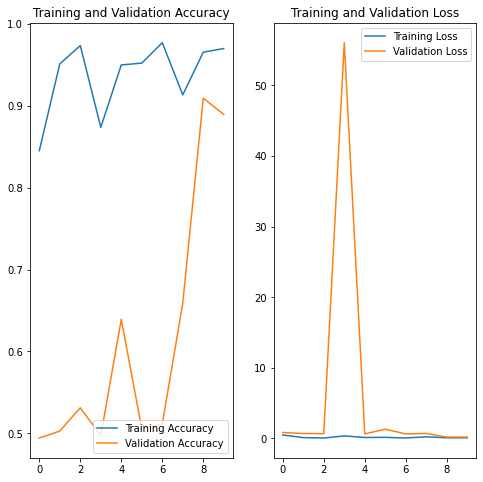

Found 1188 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
Epoch 1/10
37/37 [==============================] - 2s 41ms/step - loss: 0.9073 - accuracy: 0.7111 - val_loss: 0.6913 - val_accuracy: 0.5938
Epoch 2/10
37/37 [==============================] - 1s 39ms/step - loss: 0.7436 - accuracy: 0.6488 - val_loss: 0.5918 - val_accuracy: 0.6302
Epoch 3/10
37/37 [==============================] - 1s 40ms/step - loss: 0.7637 - accuracy: 0.6289 - val_loss: 0.9521 - val_accuracy: 0.5156
Epoch 4/10
37/37 [==============================] - 1s 39ms/step - loss: 0.7785 - accuracy: 0.6644 - val_loss: 3.1377 - val_accuracy: 0.5312
Epoch 5/10
37/37 [==============================] - 1s 40ms/step - loss: 0.8289 - accuracy: 0.7323 - val_loss: 125.0332 - val_accuracy: 0.5312
Epoch 6/10
37/37 [==============================] - 1s 39ms/step - loss: 0.6694 - accuracy: 0.7898 - val_loss: 2.8109 - val_accuracy: 0.6562
Epoch 7/10
37/37 [==============================] - 1s 40ms/step - lo

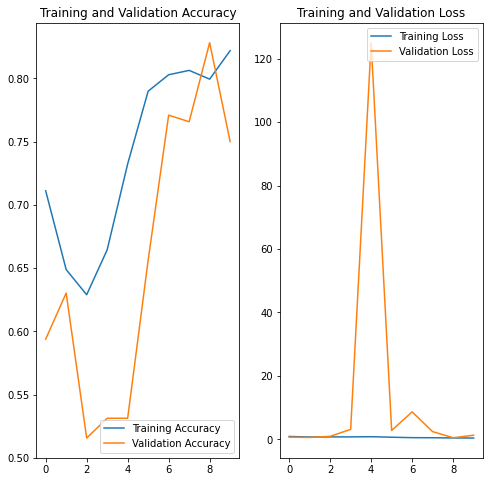

2278 374
Found 2278 images belonging to 2 classes.
Found 374 images belonging to 2 classes.
Epoch 1/10
71/71 [==============================] - 4s 52ms/step - loss: 0.3746 - accuracy: 0.8882 - val_loss: 9.0571 - val_accuracy: 0.5000
Epoch 2/10
71/71 [==============================] - 3s 40ms/step - loss: 0.1002 - accuracy: 0.9666 - val_loss: 2.3922 - val_accuracy: 0.5142
Epoch 3/10
71/71 [==============================] - 3s 38ms/step - loss: 0.0929 - accuracy: 0.9728 - val_loss: 0.7371 - val_accuracy: 0.4943
Epoch 4/10
71/71 [==============================] - 3s 39ms/step - loss: 0.0657 - accuracy: 0.9795 - val_loss: 0.6818 - val_accuracy: 0.5085
Epoch 5/10
71/71 [==============================] - 3s 39ms/step - loss: 0.0717 - accuracy: 0.9782 - val_loss: 1.1802 - val_accuracy: 0.5057
Epoch 6/10
71/71 [==============================] - 3s 39ms/step - loss: 0.0713 - accuracy: 0.9800 - val_loss: 0.5892 - val_accuracy: 0.6222
Epoch 7/10
71/71 [==============================] - 3s 39ms/st

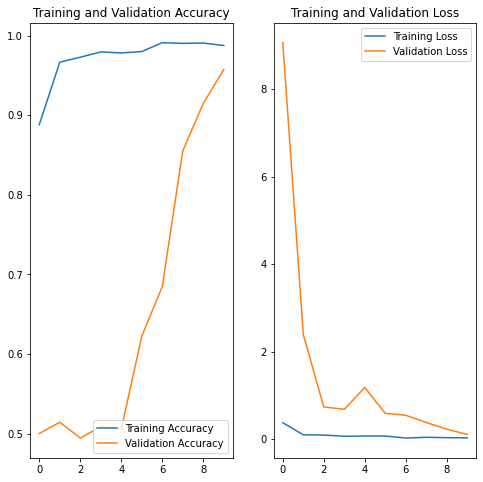

Found 1188 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
Epoch 1/10
37/37 [==============================] - 2s 41ms/step - loss: 1.0251 - accuracy: 0.6237 - val_loss: 3355251.2500 - val_accuracy: 0.5104
Epoch 2/10
37/37 [==============================] - 1s 40ms/step - loss: 0.9663 - accuracy: 0.5346 - val_loss: 62760.7930 - val_accuracy: 0.5208
Epoch 3/10
37/37 [==============================] - 1s 39ms/step - loss: 0.7753 - accuracy: 0.5026 - val_loss: 3002.9016 - val_accuracy: 0.4896
Epoch 4/10
37/37 [==============================] - 1s 39ms/step - loss: 0.7482 - accuracy: 0.4991 - val_loss: 72.5554 - val_accuracy: 0.5469
Epoch 5/10
37/37 [==============================] - 1s 39ms/step - loss: 0.8144 - accuracy: 0.5061 - val_loss: 81.3780 - val_accuracy: 0.4844
Epoch 6/10
37/37 [==============================] - 1s 40ms/step - loss: 0.9940 - accuracy: 0.5147 - val_loss: 0.7224 - val_accuracy: 0.4479
Epoch 7/10
37/37 [==============================] - 1s 4

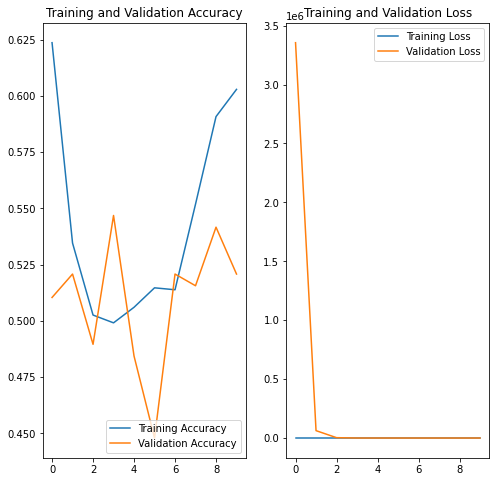

2278 374
Found 2278 images belonging to 2 classes.
Found 374 images belonging to 2 classes.
Epoch 1/10
71/71 [==============================] - 4s 52ms/step - loss: 0.3375 - accuracy: 0.8972 - val_loss: 1.6349 - val_accuracy: 0.4886
Epoch 2/10
71/71 [==============================] - 3s 40ms/step - loss: 0.3461 - accuracy: 0.9038 - val_loss: 0.6785 - val_accuracy: 0.7926
Epoch 3/10
71/71 [==============================] - 3s 39ms/step - loss: 0.1563 - accuracy: 0.9390 - val_loss: 0.6874 - val_accuracy: 0.5000
Epoch 4/10
71/71 [==============================] - 3s 39ms/step - loss: 0.2466 - accuracy: 0.9288 - val_loss: 0.6323 - val_accuracy: 0.7926
Epoch 5/10
71/71 [==============================] - 3s 39ms/step - loss: 0.1056 - accuracy: 0.9657 - val_loss: 0.6175 - val_accuracy: 0.7017
Epoch 6/10
71/71 [==============================] - 3s 39ms/step - loss: 0.0828 - accuracy: 0.9746 - val_loss: 0.3953 - val_accuracy: 0.8295
Epoch 7/10
71/71 [==============================] - 3s 38ms/st

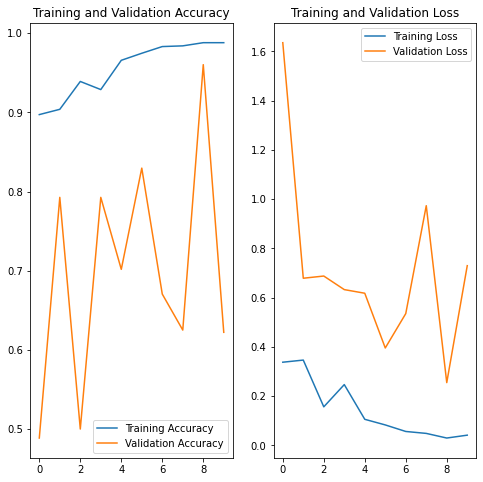

Found 1188 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
Epoch 1/10
37/37 [==============================] - 2s 41ms/step - loss: 0.9550 - accuracy: 0.6211 - val_loss: 99508.0000 - val_accuracy: 0.5208
Epoch 2/10
37/37 [==============================] - 1s 38ms/step - loss: 0.8236 - accuracy: 0.5900 - val_loss: 7576.8062 - val_accuracy: 0.4740
Epoch 3/10
37/37 [==============================] - 1s 40ms/step - loss: 0.7670 - accuracy: 0.6384 - val_loss: 55.0430 - val_accuracy: 0.5000
Epoch 4/10
37/37 [==============================] - 1s 38ms/step - loss: 0.7323 - accuracy: 0.6298 - val_loss: 35.8051 - val_accuracy: 0.6250
Epoch 5/10
37/37 [==============================] - 1s 40ms/step - loss: 0.6457 - accuracy: 0.6929 - val_loss: 3.5256 - val_accuracy: 0.6406
Epoch 6/10
37/37 [==============================] - 1s 40ms/step - loss: 0.6494 - accuracy: 0.7102 - val_loss: 0.5897 - val_accuracy: 0.7188
Epoch 7/10
37/37 [==============================] - 1s 40ms/st

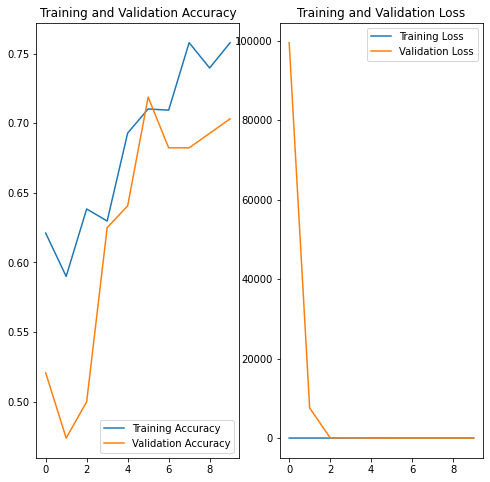

2278 374
Found 2278 images belonging to 2 classes.
Found 374 images belonging to 2 classes.
Epoch 1/10
71/71 [==============================] - 4s 52ms/step - loss: 0.5589 - accuracy: 0.8633 - val_loss: 163.3824 - val_accuracy: 0.5057
Epoch 2/10
71/71 [==============================] - 3s 38ms/step - loss: 0.1332 - accuracy: 0.9613 - val_loss: 0.7709 - val_accuracy: 0.5000
Epoch 3/10
71/71 [==============================] - 3s 37ms/step - loss: 0.0719 - accuracy: 0.9768 - val_loss: 0.6619 - val_accuracy: 0.5057
Epoch 4/10
71/71 [==============================] - 3s 38ms/step - loss: 0.0835 - accuracy: 0.9728 - val_loss: 0.6190 - val_accuracy: 0.8125
Epoch 5/10
71/71 [==============================] - 3s 38ms/step - loss: 0.1238 - accuracy: 0.9626 - val_loss: 0.6391 - val_accuracy: 0.5597
Epoch 6/10
71/71 [==============================] - 3s 38ms/step - loss: 0.0973 - accuracy: 0.9697 - val_loss: 0.6511 - val_accuracy: 0.5455
Epoch 7/10
71/71 [==============================] - 3s 37ms/

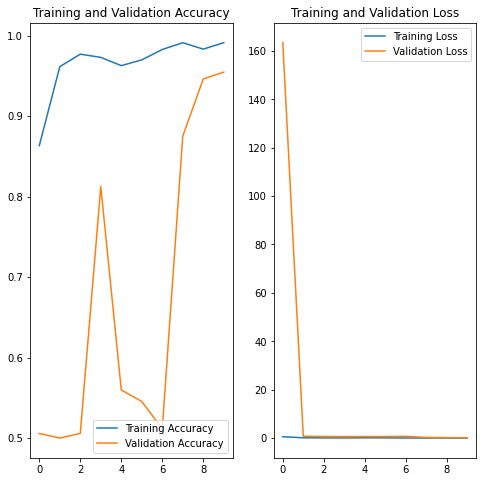

Found 1188 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
Epoch 1/10
37/37 [==============================] - 1s 39ms/step - loss: 0.9410 - accuracy: 0.6142 - val_loss: 7413.5630 - val_accuracy: 0.4740
Epoch 2/10
37/37 [==============================] - 1s 38ms/step - loss: 0.9299 - accuracy: 0.5009 - val_loss: 764.0148 - val_accuracy: 0.4792
Epoch 3/10
37/37 [==============================] - 1s 38ms/step - loss: 0.7978 - accuracy: 0.4939 - val_loss: 424.2894 - val_accuracy: 0.5156
Epoch 4/10
37/37 [==============================] - 1s 35ms/step - loss: 0.9323 - accuracy: 0.5026 - val_loss: 102.5302 - val_accuracy: 0.4896
Epoch 5/10
37/37 [==============================] - 1s 37ms/step - loss: 1.0217 - accuracy: 0.5182 - val_loss: 111.9200 - val_accuracy: 0.5000
Epoch 6/10
37/37 [==============================] - 1s 39ms/step - loss: 0.7708 - accuracy: 0.5026 - val_loss: 58.3689 - val_accuracy: 0.4740
Epoch 7/10
37/37 [==============================] - 1s 39ms

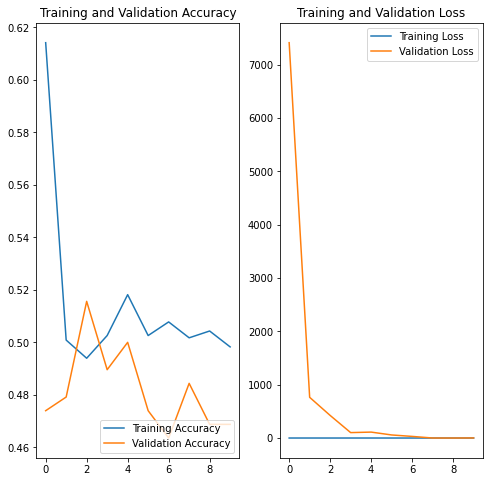

2278 374
Found 2278 images belonging to 2 classes.
Found 374 images belonging to 2 classes.
Epoch 1/10
71/71 [==============================] - 4s 62ms/step - loss: 0.3386 - accuracy: 0.9016 - val_loss: 3.9720 - val_accuracy: 0.5057
Epoch 2/10
71/71 [==============================] - 3s 46ms/step - loss: 0.2570 - accuracy: 0.9127 - val_loss: 0.6839 - val_accuracy: 0.5114
Epoch 3/10
71/71 [==============================] - 3s 36ms/step - loss: 0.1193 - accuracy: 0.9604 - val_loss: 1.0764 - val_accuracy: 0.5114
Epoch 4/10
71/71 [==============================] - 3s 36ms/step - loss: 0.1496 - accuracy: 0.9568 - val_loss: 29.3994 - val_accuracy: 0.2841
Epoch 5/10
71/71 [==============================] - 3s 36ms/step - loss: 0.0876 - accuracy: 0.9733 - val_loss: 0.7942 - val_accuracy: 0.5057
Epoch 6/10
71/71 [==============================] - 3s 37ms/step - loss: 0.0952 - accuracy: 0.9742 - val_loss: 0.4404 - val_accuracy: 0.8182
Epoch 7/10
71/71 [==============================] - 3s 37ms/s

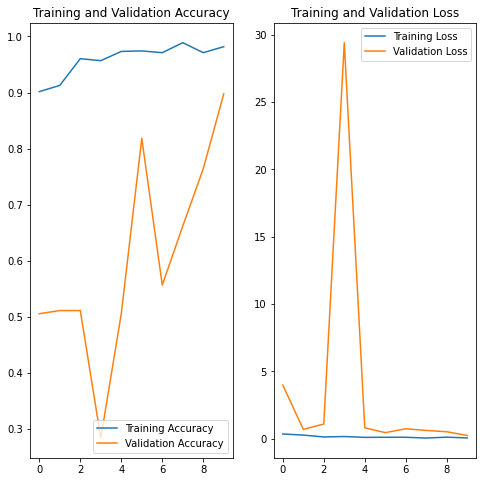

Found 1188 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
Epoch 1/10
37/37 [==============================] - 1s 38ms/step - loss: 0.9076 - accuracy: 0.6272 - val_loss: 320.4184 - val_accuracy: 0.4792
Epoch 2/10
37/37 [==============================] - 1s 37ms/step - loss: 0.6781 - accuracy: 0.6652 - val_loss: 0.9925 - val_accuracy: 0.5573
Epoch 3/10
37/37 [==============================] - 1s 37ms/step - loss: 0.6178 - accuracy: 0.6808 - val_loss: 3.6817 - val_accuracy: 0.5208
Epoch 4/10
37/37 [==============================] - 1s 36ms/step - loss: 0.5498 - accuracy: 0.7336 - val_loss: 0.5904 - val_accuracy: 0.7188
Epoch 5/10
37/37 [==============================] - 1s 37ms/step - loss: 0.5279 - accuracy: 0.7673 - val_loss: 0.7897 - val_accuracy: 0.6042
Epoch 6/10
37/37 [==============================] - 1s 37ms/step - loss: 0.6378 - accuracy: 0.7154 - val_loss: 0.7060 - val_accuracy: 0.5521
Epoch 7/10
37/37 [==============================] - 1s 37ms/step - lo

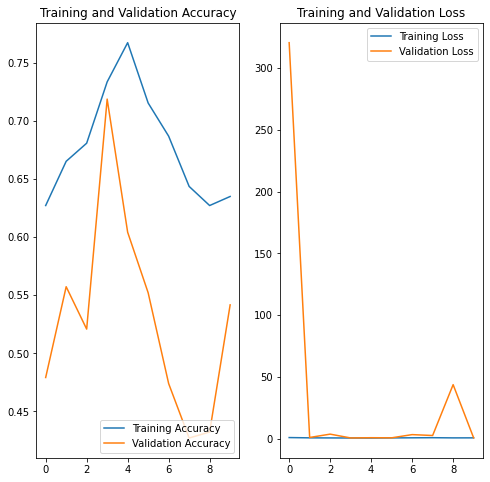

2278 374
Found 2278 images belonging to 2 classes.
Found 374 images belonging to 2 classes.
Epoch 1/10
71/71 [==============================] - 4s 51ms/step - loss: 0.3692 - accuracy: 0.8825 - val_loss: 1.8429 - val_accuracy: 0.5057
Epoch 2/10
71/71 [==============================] - 3s 36ms/step - loss: 0.1218 - accuracy: 0.9626 - val_loss: 0.6920 - val_accuracy: 0.5114
Epoch 3/10
71/71 [==============================] - 3s 36ms/step - loss: 0.0796 - accuracy: 0.9795 - val_loss: 0.7222 - val_accuracy: 0.4943
Epoch 4/10
71/71 [==============================] - 3s 35ms/step - loss: 0.1025 - accuracy: 0.9720 - val_loss: 0.7257 - val_accuracy: 0.4972
Epoch 5/10
71/71 [==============================] - 2s 35ms/step - loss: 0.0622 - accuracy: 0.9800 - val_loss: 0.6160 - val_accuracy: 0.6591
Epoch 6/10
71/71 [==============================] - 3s 36ms/step - loss: 0.0683 - accuracy: 0.9733 - val_loss: 1.1347 - val_accuracy: 0.5398
Epoch 7/10
71/71 [==============================] - 3s 35ms/st

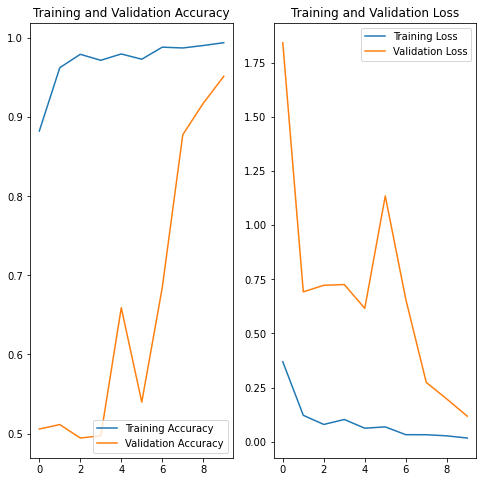

Found 1188 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
Epoch 1/10
37/37 [==============================] - 1s 37ms/step - loss: 1.1167 - accuracy: 0.5614 - val_loss: 16292439040.0000 - val_accuracy: 0.5260
Epoch 2/10
37/37 [==============================] - 1s 36ms/step - loss: 0.8733 - accuracy: 0.5017 - val_loss: 3043337.2500 - val_accuracy: 0.5156
Epoch 3/10
37/37 [==============================] - 1s 36ms/step - loss: 0.8499 - accuracy: 0.4905 - val_loss: 1896.9531 - val_accuracy: 0.5625
Epoch 4/10
37/37 [==============================] - 1s 36ms/step - loss: 0.7502 - accuracy: 0.5242 - val_loss: 10.9118 - val_accuracy: 0.5365
Epoch 5/10
37/37 [==============================] - 1s 36ms/step - loss: 0.8041 - accuracy: 0.5164 - val_loss: 0.6910 - val_accuracy: 0.4896
Epoch 6/10
37/37 [==============================] - 1s 35ms/step - loss: 0.8360 - accuracy: 0.5173 - val_loss: 51.9312 - val_accuracy: 0.5521
Epoch 7/10
37/37 [==============================] 

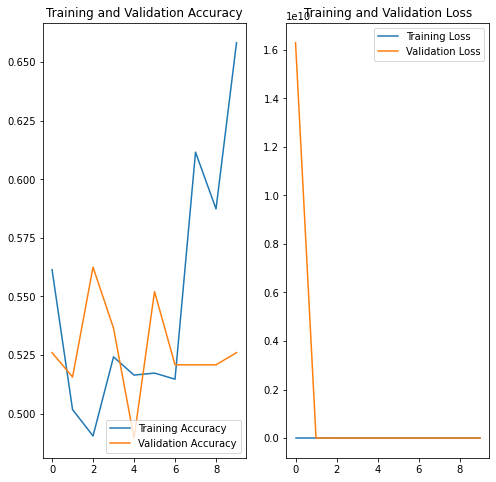

2278 374
Found 2278 images belonging to 2 classes.
Found 374 images belonging to 2 classes.
Epoch 1/10
71/71 [==============================] - 4s 50ms/step - loss: 0.4540 - accuracy: 0.8727 - val_loss: 1.1753 - val_accuracy: 0.5085
Epoch 2/10
71/71 [==============================] - 2s 35ms/step - loss: 0.1097 - accuracy: 0.9622 - val_loss: 0.7071 - val_accuracy: 0.5028
Epoch 3/10
71/71 [==============================] - 2s 35ms/step - loss: 0.1571 - accuracy: 0.9630 - val_loss: 3.4467 - val_accuracy: 0.5028
Epoch 4/10
71/71 [==============================] - 3s 35ms/step - loss: 0.1007 - accuracy: 0.9693 - val_loss: 0.7568 - val_accuracy: 0.5028
Epoch 5/10
71/71 [==============================] - 2s 35ms/step - loss: 0.0604 - accuracy: 0.9791 - val_loss: 0.5347 - val_accuracy: 0.7074
Epoch 6/10
71/71 [==============================] - 3s 35ms/step - loss: 0.0417 - accuracy: 0.9858 - val_loss: 0.5590 - val_accuracy: 0.7642
Epoch 7/10
71/71 [==============================] - 2s 35ms/st

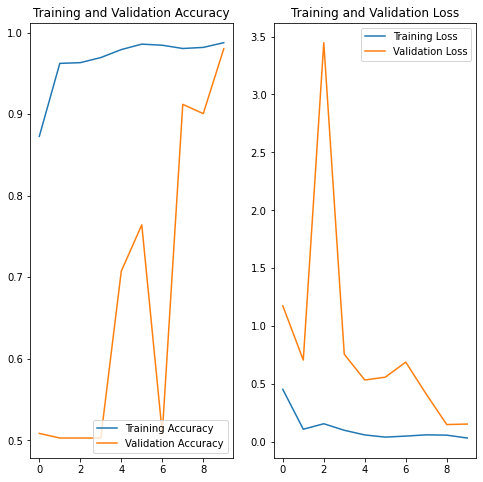

Found 1188 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
Epoch 1/10
37/37 [==============================] - 1s 37ms/step - loss: 0.8956 - accuracy: 0.6462 - val_loss: 0.7871 - val_accuracy: 0.4896
Epoch 2/10
37/37 [==============================] - 1s 35ms/step - loss: 0.8370 - accuracy: 0.5026 - val_loss: 8.2510 - val_accuracy: 0.5260
Epoch 3/10
37/37 [==============================] - 1s 36ms/step - loss: 0.7706 - accuracy: 0.4983 - val_loss: 0.6925 - val_accuracy: 0.5312
Epoch 4/10
37/37 [==============================] - 1s 35ms/step - loss: 0.8680 - accuracy: 0.5121 - val_loss: 0.6928 - val_accuracy: 0.5365
Epoch 5/10
37/37 [==============================] - 1s 35ms/step - loss: 0.7956 - accuracy: 0.5035 - val_loss: 0.7738 - val_accuracy: 0.5052
Epoch 6/10
37/37 [==============================] - 1s 35ms/step - loss: 0.7127 - accuracy: 0.5095 - val_loss: 1.7930 - val_accuracy: 0.4375
Epoch 7/10
37/37 [==============================] - 1s 36ms/step - loss

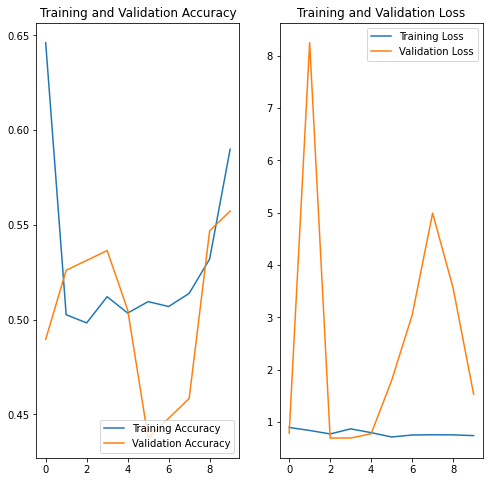

2278 374
Found 2278 images belonging to 2 classes.
Found 374 images belonging to 2 classes.
Epoch 1/10
71/71 [==============================] - 4s 58ms/step - loss: 0.4680 - accuracy: 0.8673 - val_loss: 11.5345 - val_accuracy: 0.4972
Epoch 2/10
71/71 [==============================] - 3s 35ms/step - loss: 0.1921 - accuracy: 0.9386 - val_loss: 1.1164 - val_accuracy: 0.5057
Epoch 3/10
71/71 [==============================] - 3s 35ms/step - loss: 0.1075 - accuracy: 0.9648 - val_loss: 0.6656 - val_accuracy: 0.5114
Epoch 4/10
71/71 [==============================] - 3s 35ms/step - loss: 0.1306 - accuracy: 0.9613 - val_loss: 0.6441 - val_accuracy: 0.5114
Epoch 5/10
71/71 [==============================] - 3s 35ms/step - loss: 0.0737 - accuracy: 0.9786 - val_loss: 0.7575 - val_accuracy: 0.5369
Epoch 6/10
71/71 [==============================] - 2s 35ms/step - loss: 0.2607 - accuracy: 0.9350 - val_loss: 0.6352 - val_accuracy: 0.5540
Epoch 7/10
71/71 [==============================] - 2s 35ms/s

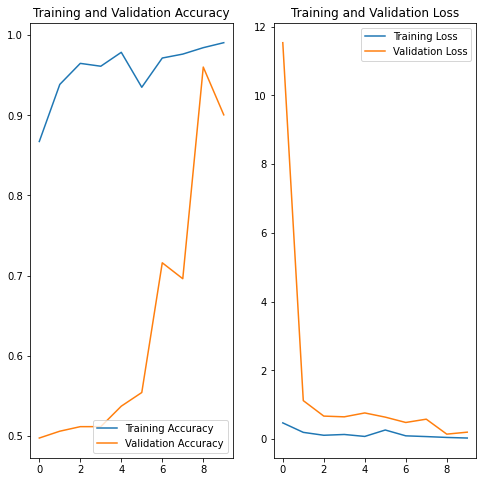

Found 1188 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
Epoch 1/10
37/37 [==============================] - 1s 37ms/step - loss: 0.9847 - accuracy: 0.6488 - val_loss: 213.8260 - val_accuracy: 0.6719
Epoch 2/10
37/37 [==============================] - 1s 36ms/step - loss: 0.5744 - accuracy: 0.7578 - val_loss: 201.9462 - val_accuracy: 0.5312
Epoch 3/10
37/37 [==============================] - 1s 35ms/step - loss: 0.3986 - accuracy: 0.8304 - val_loss: 6.7203 - val_accuracy: 0.5521
Epoch 4/10
37/37 [==============================] - 1s 36ms/step - loss: 0.4034 - accuracy: 0.8417 - val_loss: 0.7140 - val_accuracy: 0.5833
Epoch 5/10
37/37 [==============================] - 1s 36ms/step - loss: 0.3373 - accuracy: 0.8659 - val_loss: 0.3485 - val_accuracy: 0.8490
Epoch 6/10
37/37 [==============================] - 1s 36ms/step - loss: 0.3032 - accuracy: 0.8737 - val_loss: 0.3052 - val_accuracy: 0.8698
Epoch 7/10
37/37 [==============================] - 1s 36ms/step - 

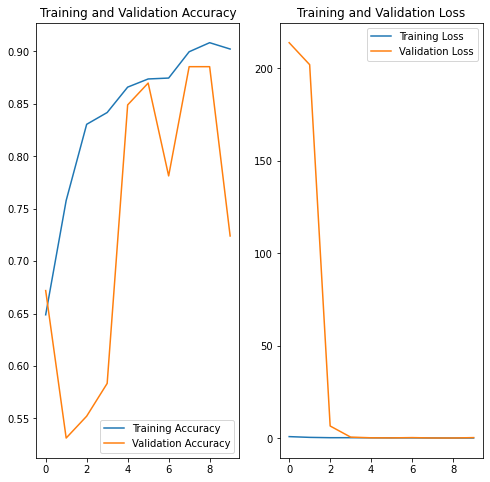

2278 374
Found 2278 images belonging to 2 classes.
Found 374 images belonging to 2 classes.
Epoch 1/10
71/71 [==============================] - 4s 50ms/step - loss: 0.5679 - accuracy: 0.8428 - val_loss: 0.8576 - val_accuracy: 0.5000
Epoch 2/10
71/71 [==============================] - 2s 35ms/step - loss: 0.1338 - accuracy: 0.9559 - val_loss: 3.1432 - val_accuracy: 0.4915
Epoch 3/10
71/71 [==============================] - 2s 35ms/step - loss: 0.0641 - accuracy: 0.9773 - val_loss: 0.6932 - val_accuracy: 0.4943
Epoch 4/10
71/71 [==============================] - 2s 35ms/step - loss: 0.0758 - accuracy: 0.9737 - val_loss: 0.7393 - val_accuracy: 0.4858
Epoch 5/10
71/71 [==============================] - 3s 35ms/step - loss: 0.0988 - accuracy: 0.9684 - val_loss: 0.5314 - val_accuracy: 0.8551
Epoch 6/10
71/71 [==============================] - 3s 35ms/step - loss: 0.0572 - accuracy: 0.9849 - val_loss: 0.4152 - val_accuracy: 0.8864
Epoch 7/10
71/71 [==============================] - 3s 35ms/st

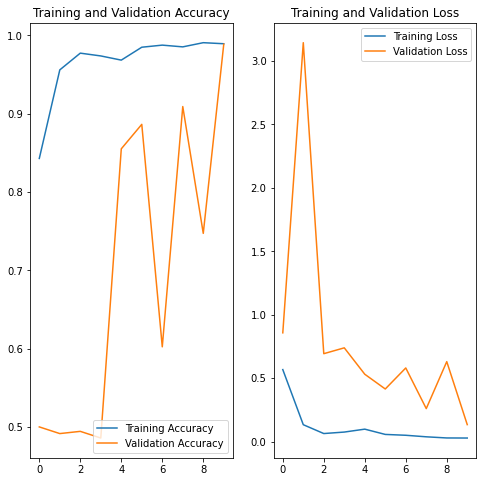

Found 1188 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
Epoch 1/10
37/37 [==============================] - 1s 37ms/step - loss: 0.6239 - accuracy: 0.7673 - val_loss: 244.5173 - val_accuracy: 0.5833
Epoch 2/10
37/37 [==============================] - 1s 36ms/step - loss: 0.4436 - accuracy: 0.8227 - val_loss: 24.4836 - val_accuracy: 0.6094
Epoch 3/10
37/37 [==============================] - 1s 36ms/step - loss: 0.4288 - accuracy: 0.8218 - val_loss: 3.5612 - val_accuracy: 0.6823
Epoch 4/10
37/37 [==============================] - 1s 36ms/step - loss: 0.4490 - accuracy: 0.7958 - val_loss: 0.6448 - val_accuracy: 0.6302
Epoch 5/10
37/37 [==============================] - 1s 36ms/step - loss: 0.3747 - accuracy: 0.8400 - val_loss: 1.0161 - val_accuracy: 0.6354
Epoch 6/10
37/37 [==============================] - 1s 36ms/step - loss: 0.3176 - accuracy: 0.8555 - val_loss: 0.2982 - val_accuracy: 0.8438
Epoch 7/10
37/37 [==============================] - 1s 36ms/step - l

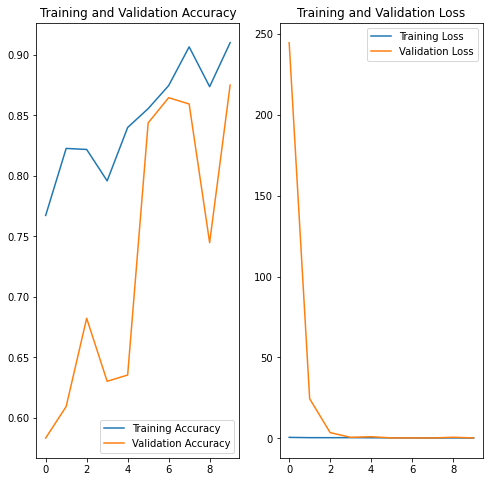

52.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


In [4]:
for i in range(10):
    j = (i+1) % 10 # i for val, j for test
    path_train = path_base+'tr/'
    path_val = path_base+'val/'

    num_0_train = len(os.listdir(path_train+'0'))
    num_1_train = len(os.listdir(path_train+'1'))

    num_0_val = len(os.listdir(path_val+'0'))
    num_1_val = len(os.listdir(path_val+'1'))

    total_train = num_0_train + num_1_train
    total_val = num_0_val + num_1_val

    print(total_train, total_val)

    # batch_size = 64
    batch_size = 32
    epochs = 10
    IMG_HEIGHT = 32
    IMG_WIDTH = 32

    train_image_generator = ImageDataGenerator(rescale=1./255) # 学習データのジェネレータ
    val_image_generator = ImageDataGenerator(rescale=1./255) # 検証データのジェネレータ
    # predict_image_generator = ImageDataGenerator(rescale=1./255) # 予測データのジェネレータ

    train_data_gen = train_image_generator.flow_from_directory(directory=path_train,
                                                               shuffle=True,
                                                               target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                               class_mode='binary')

    val_data_gen = val_image_generator.flow_from_directory(directory=path_val,
                                                                  target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                                  class_mode='binary')

    input_tensor = Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    base_model = tf.keras.applications.ResNet50(
        include_top=False, weights='imagenet', input_tensor=input_tensor, pooling='avg'
    )

    top_model = Sequential()
    top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
    top_model.add(Dense(1, activation='sigmoid'))


    model = models.Model(inputs=base_model.input, outputs=top_model(base_model.output))

    from tensorflow.keras import optimizers
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.Adam(lr=1e-3),
                  metrics=['accuracy'])

    # model.summary()




    history = model.fit_generator(
        train_data_gen,
        steps_per_epoch=total_train // batch_size,
        epochs=epochs,
        validation_data=val_data_gen,
        validation_steps=total_val // batch_size
    )

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # with open('../data/acc/natural2(synthetic).txt', mode='a') as f:
    #     f.write(str(val_acc[-1]) + '\n')

    for l in model.layers[:-1]:
        l.trainable = False
    # model.summary()

    path_train = path_novel2+'tr/'
    path_val = path_novel2+'val/'

    num_0_train = len(os.listdir(path_train+'0'))
    num_1_train = len(os.listdir(path_train+'1'))

    num_0_val = len(os.listdir(path_val+'0'))
    num_1_val = len(os.listdir(path_val+'1'))

    total_train = num_0_train + num_1_train
    total_val = num_0_val + num_1_val

    train_image_generator = ImageDataGenerator(rescale=1./255) # 学習データのジェネレータ
    val_image_generator = ImageDataGenerator(rescale=1./255) # 検証データのジェネレータ
    # predict_image_generator = ImageDataGenerator(rescale=1./255) # 予測データのジェネレータ

    train_data_gen = train_image_generator.flow_from_directory(directory=path_train,
                                                               shuffle=True,
                                                               target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                               class_mode='binary')

    val_data_gen = val_image_generator.flow_from_directory(directory=path_val,
                                                                  target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                                  class_mode='binary')


    history = model.fit_generator(
        train_data_gen,
        steps_per_epoch=total_train // batch_size,
        epochs=epochs,
        validation_data=val_data_gen,
        validation_steps=total_val // batch_size
    )

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # with open('../data/acc/natural2(natural).txt', mode='a') as f:
    #     f.write(str(val_acc[-1]) + '\n')
    prob.append(val_acc[-1])

In [6]:
np.array(prob).mean(), np.array(prob).max()

(0.6171875, 0.875)

2278 374
Found 2278 images belonging to 2 classes.
Found 374 images belonging to 2 classes.
Epoch 1/100
71/71 [==============================] - 3s 49ms/step - loss: 0.3894 - accuracy: 0.8633 - val_loss: 0.6997 - val_accuracy: 0.4943
Epoch 2/100
71/71 [==============================] - 2s 35ms/step - loss: 0.1434 - accuracy: 0.9528 - val_loss: 0.7270 - val_accuracy: 0.5000
Epoch 3/100
71/71 [==============================] - 2s 35ms/step - loss: 0.0623 - accuracy: 0.9800 - val_loss: 0.6717 - val_accuracy: 0.7131
Epoch 4/100
71/71 [==============================] - 2s 35ms/step - loss: 0.0560 - accuracy: 0.9804 - val_loss: 0.6615 - val_accuracy: 0.5369
Epoch 5/100
71/71 [==============================] - 2s 34ms/step - loss: 0.1696 - accuracy: 0.9497 - val_loss: 0.5379 - val_accuracy: 0.8409
Epoch 6/100
71/71 [==============================] - 2s 34ms/step - loss: 0.0706 - accuracy: 0.9791 - val_loss: 0.5971 - val_accuracy: 0.5142
Epoch 7/100
71/71 [==============================] - 2s 

Epoch 58/100
71/71 [==============================] - 2s 35ms/step - loss: 0.0391 - accuracy: 0.9871 - val_loss: 0.0328 - val_accuracy: 0.9830
Epoch 59/100
71/71 [==============================] - 2s 35ms/step - loss: 0.0130 - accuracy: 0.9955 - val_loss: 0.0316 - val_accuracy: 0.9915
Epoch 60/100
71/71 [==============================] - 2s 35ms/step - loss: 0.0125 - accuracy: 0.9951 - val_loss: 0.0404 - val_accuracy: 0.9915
Epoch 61/100
71/71 [==============================] - 2s 35ms/step - loss: 0.0246 - accuracy: 0.9933 - val_loss: 0.0768 - val_accuracy: 0.9773
Epoch 62/100
71/71 [==============================] - 3s 36ms/step - loss: 0.0536 - accuracy: 0.9795 - val_loss: 0.1214 - val_accuracy: 0.9631
Epoch 63/100
71/71 [==============================] - 2s 35ms/step - loss: 0.0181 - accuracy: 0.9960 - val_loss: 0.0221 - val_accuracy: 0.9915
Epoch 64/100
71/71 [==============================] - 2s 34ms/step - loss: 0.0165 - accuracy: 0.9955 - val_loss: 0.0389 - val_accuracy: 0.9886

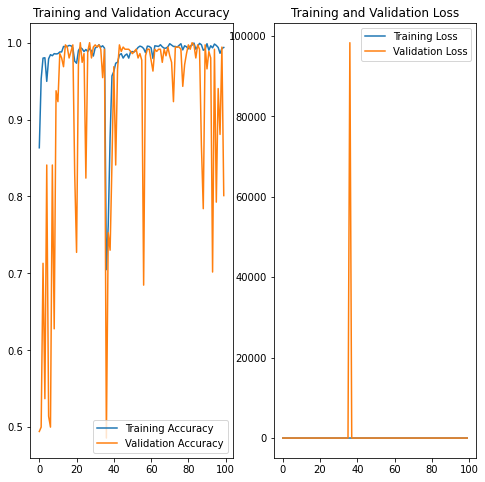

Found 1188 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
Epoch 1/100
37/37 [==============================] - 1s 37ms/step - loss: 1.3349 - accuracy: 0.5874 - val_loss: 110035.0391 - val_accuracy: 0.5156
Epoch 2/100
37/37 [==============================] - 1s 35ms/step - loss: 1.0853 - accuracy: 0.5112 - val_loss: 5992.7524 - val_accuracy: 0.4688
Epoch 3/100
37/37 [==============================] - 1s 36ms/step - loss: 1.1930 - accuracy: 0.5009 - val_loss: 2270.2024 - val_accuracy: 0.5260
Epoch 4/100
37/37 [==============================] - 1s 36ms/step - loss: 0.9026 - accuracy: 0.6003 - val_loss: 99.0597 - val_accuracy: 0.6146
Epoch 5/100
37/37 [==============================] - 1s 35ms/step - loss: 0.9415 - accuracy: 0.6877 - val_loss: 22.1999 - val_accuracy: 0.5625
Epoch 6/100
37/37 [==============================] - 1s 36ms/step - loss: 0.6261 - accuracy: 0.7405 - val_loss: 6.1576 - val_accuracy: 0.6250
Epoch 7/100
37/37 [==============================] -

Epoch 58/100
37/37 [==============================] - 1s 35ms/step - loss: 0.1247 - accuracy: 0.9485 - val_loss: 0.4312 - val_accuracy: 0.8490
Epoch 59/100
37/37 [==============================] - 1s 35ms/step - loss: 0.1596 - accuracy: 0.9386 - val_loss: 1.3349 - val_accuracy: 0.8125
Epoch 60/100
37/37 [==============================] - 1s 35ms/step - loss: 0.1720 - accuracy: 0.9299 - val_loss: 0.5554 - val_accuracy: 0.8646
Epoch 61/100
37/37 [==============================] - 1s 36ms/step - loss: 0.0932 - accuracy: 0.9689 - val_loss: 0.3506 - val_accuracy: 0.8646
Epoch 62/100
37/37 [==============================] - 1s 36ms/step - loss: 0.1150 - accuracy: 0.9628 - val_loss: 0.3721 - val_accuracy: 0.8802
Epoch 63/100
37/37 [==============================] - 1s 36ms/step - loss: 0.1274 - accuracy: 0.9567 - val_loss: 0.3225 - val_accuracy: 0.8906
Epoch 64/100
37/37 [==============================] - 1s 35ms/step - loss: 0.1807 - accuracy: 0.9343 - val_loss: 0.3756 - val_accuracy: 0.8542

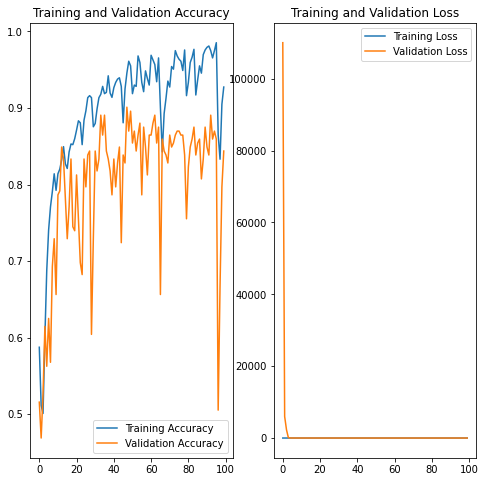

2278 374
Found 2278 images belonging to 2 classes.
Found 374 images belonging to 2 classes.
Epoch 1/100
71/71 [==============================] - 4s 51ms/step - loss: 0.5261 - accuracy: 0.8348 - val_loss: 0.6068 - val_accuracy: 0.6449
Epoch 2/100
71/71 [==============================] - 2s 35ms/step - loss: 0.1493 - accuracy: 0.9537 - val_loss: 0.6890 - val_accuracy: 0.5057
Epoch 3/100
71/71 [==============================] - 2s 35ms/step - loss: 0.0755 - accuracy: 0.9791 - val_loss: 0.6560 - val_accuracy: 0.6449
Epoch 4/100
71/71 [==============================] - 2s 35ms/step - loss: 0.0958 - accuracy: 0.9711 - val_loss: 0.6642 - val_accuracy: 0.7670
Epoch 5/100
71/71 [==============================] - 3s 35ms/step - loss: 0.0514 - accuracy: 0.9840 - val_loss: 0.6365 - val_accuracy: 0.5909
Epoch 6/100
71/71 [==============================] - 2s 35ms/step - loss: 0.0562 - accuracy: 0.9844 - val_loss: 0.6170 - val_accuracy: 0.5540
Epoch 7/100
71/71 [==============================] - 2s 

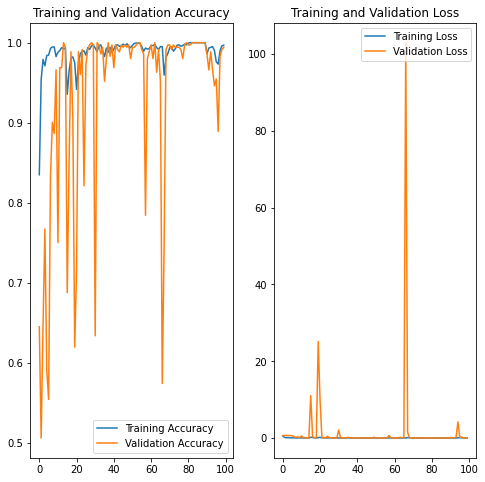

Found 1188 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
Epoch 1/100
37/37 [==============================] - 1s 38ms/step - loss: 0.7238 - accuracy: 0.8062 - val_loss: 0.5160 - val_accuracy: 0.7448
Epoch 2/100
37/37 [==============================] - 1s 36ms/step - loss: 0.5538 - accuracy: 0.7915 - val_loss: 0.5743 - val_accuracy: 0.6927
Epoch 3/100
37/37 [==============================] - 1s 36ms/step - loss: 0.6144 - accuracy: 0.8019 - val_loss: 4.4175 - val_accuracy: 0.5938
Epoch 4/100
37/37 [==============================] - 1s 36ms/step - loss: 0.3439 - accuracy: 0.8538 - val_loss: 0.4456 - val_accuracy: 0.8385
Epoch 5/100
37/37 [==============================] - 1s 37ms/step - loss: 0.2919 - accuracy: 0.8737 - val_loss: 0.3314 - val_accuracy: 0.8698
Epoch 6/100
37/37 [==============================] - 1s 37ms/step - loss: 0.3495 - accuracy: 0.8452 - val_loss: 0.2825 - val_accuracy: 0.8958
Epoch 7/100
37/37 [==============================] - 1s 36ms/step

Epoch 58/100
37/37 [==============================] - 1s 37ms/step - loss: 0.0786 - accuracy: 0.9775 - val_loss: 0.3892 - val_accuracy: 0.8854
Epoch 59/100
37/37 [==============================] - 1s 37ms/step - loss: 0.2211 - accuracy: 0.9291 - val_loss: 2.8231 - val_accuracy: 0.7188
Epoch 60/100
37/37 [==============================] - 1s 37ms/step - loss: 0.1846 - accuracy: 0.9213 - val_loss: 0.2901 - val_accuracy: 0.8906
Epoch 61/100
37/37 [==============================] - 1s 37ms/step - loss: 0.1278 - accuracy: 0.9464 - val_loss: 0.3353 - val_accuracy: 0.8906
Epoch 62/100
37/37 [==============================] - 1s 37ms/step - loss: 0.0809 - accuracy: 0.9689 - val_loss: 0.2507 - val_accuracy: 0.9115
Epoch 63/100
37/37 [==============================] - 1s 37ms/step - loss: 0.0507 - accuracy: 0.9844 - val_loss: 0.3151 - val_accuracy: 0.9010
Epoch 64/100
37/37 [==============================] - 1s 37ms/step - loss: 0.0488 - accuracy: 0.9827 - val_loss: 0.6271 - val_accuracy: 0.8281

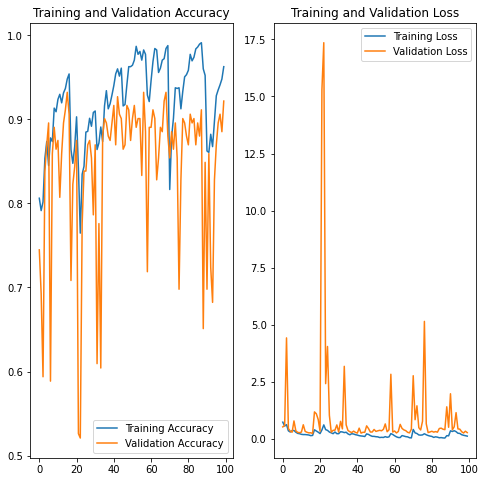

2278 374
Found 2278 images belonging to 2 classes.
Found 374 images belonging to 2 classes.
Epoch 1/100
71/71 [==============================] - 4s 51ms/step - loss: 0.5818 - accuracy: 0.8317 - val_loss: 2.6980 - val_accuracy: 0.5085
Epoch 2/100
71/71 [==============================] - 3s 36ms/step - loss: 0.2116 - accuracy: 0.9297 - val_loss: 2.9011 - val_accuracy: 0.5000
Epoch 3/100
71/71 [==============================] - 3s 36ms/step - loss: 0.1675 - accuracy: 0.9430 - val_loss: 0.6883 - val_accuracy: 0.5881
Epoch 4/100
71/71 [==============================] - 3s 36ms/step - loss: 0.1090 - accuracy: 0.9639 - val_loss: 0.6136 - val_accuracy: 0.6307
Epoch 5/100
71/71 [==============================] - 3s 36ms/step - loss: 0.0662 - accuracy: 0.9777 - val_loss: 0.6118 - val_accuracy: 0.6278
Epoch 6/100
71/71 [==============================] - 3s 37ms/step - loss: 0.0563 - accuracy: 0.9817 - val_loss: 0.6123 - val_accuracy: 0.6506
Epoch 7/100
71/71 [==============================] - 3s 

Epoch 58/100
71/71 [==============================] - 3s 36ms/step - loss: 0.0022 - accuracy: 0.9987 - val_loss: 2.7209e-04 - val_accuracy: 1.0000
Epoch 59/100
71/71 [==============================] - 3s 36ms/step - loss: 3.4784e-04 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 0.9972
Epoch 60/100
71/71 [==============================] - 3s 36ms/step - loss: 0.0281 - accuracy: 0.9960 - val_loss: 0.1332 - val_accuracy: 0.9801
Epoch 61/100
71/71 [==============================] - 3s 36ms/step - loss: 0.0392 - accuracy: 0.9893 - val_loss: 0.0298 - val_accuracy: 0.9943
Epoch 62/100
71/71 [==============================] - 3s 37ms/step - loss: 0.0271 - accuracy: 0.9929 - val_loss: 0.0159 - val_accuracy: 0.9915
Epoch 63/100
71/71 [==============================] - 3s 36ms/step - loss: 0.0145 - accuracy: 0.9951 - val_loss: 0.0040 - val_accuracy: 0.9972
Epoch 64/100
71/71 [==============================] - 3s 37ms/step - loss: 0.0111 - accuracy: 0.9969 - val_loss: 0.0076 - val_accuracy

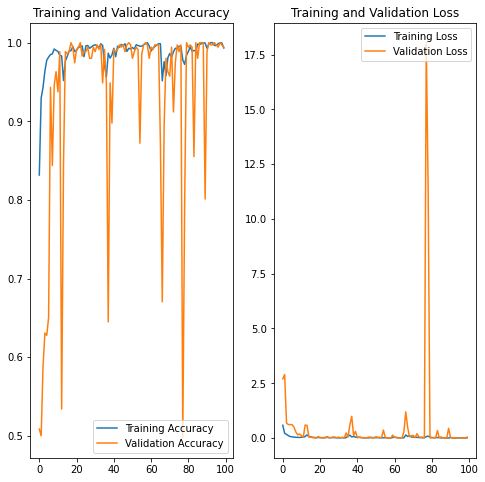

Found 1188 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
Epoch 1/100
37/37 [==============================] - 1s 38ms/step - loss: 0.8895 - accuracy: 0.7292 - val_loss: 128.2791 - val_accuracy: 0.5833
Epoch 2/100
37/37 [==============================] - 1s 37ms/step - loss: 0.4629 - accuracy: 0.7578 - val_loss: 14.3871 - val_accuracy: 0.5729
Epoch 3/100
37/37 [==============================] - 1s 36ms/step - loss: 0.4318 - accuracy: 0.7984 - val_loss: 1.8448 - val_accuracy: 0.7604
Epoch 4/100
37/37 [==============================] - 1s 37ms/step - loss: 0.3879 - accuracy: 0.8287 - val_loss: 3.0502 - val_accuracy: 0.7552
Epoch 5/100
37/37 [==============================] - 1s 37ms/step - loss: 0.3605 - accuracy: 0.8400 - val_loss: 0.7406 - val_accuracy: 0.7865
Epoch 6/100
37/37 [==============================] - 1s 37ms/step - loss: 0.3637 - accuracy: 0.8564 - val_loss: 0.3950 - val_accuracy: 0.8333
Epoch 7/100
37/37 [==============================] - 1s 36ms/s

Epoch 58/100
37/37 [==============================] - 1s 37ms/step - loss: 0.1215 - accuracy: 0.9602 - val_loss: 0.3623 - val_accuracy: 0.8802
Epoch 59/100
37/37 [==============================] - 1s 37ms/step - loss: 0.0951 - accuracy: 0.9654 - val_loss: 0.4164 - val_accuracy: 0.8385
Epoch 60/100
37/37 [==============================] - 1s 37ms/step - loss: 0.1088 - accuracy: 0.9628 - val_loss: 0.3461 - val_accuracy: 0.8750
Epoch 61/100
37/37 [==============================] - 1s 36ms/step - loss: 0.1040 - accuracy: 0.9689 - val_loss: 0.3500 - val_accuracy: 0.8854
Epoch 62/100
37/37 [==============================] - 1s 37ms/step - loss: 0.0814 - accuracy: 0.9680 - val_loss: 0.3794 - val_accuracy: 0.8854
Epoch 63/100
37/37 [==============================] - 1s 37ms/step - loss: 0.0885 - accuracy: 0.9663 - val_loss: 0.5050 - val_accuracy: 0.8385
Epoch 64/100
37/37 [==============================] - 1s 37ms/step - loss: 0.3400 - accuracy: 0.8711 - val_loss: 0.6436 - val_accuracy: 0.7760

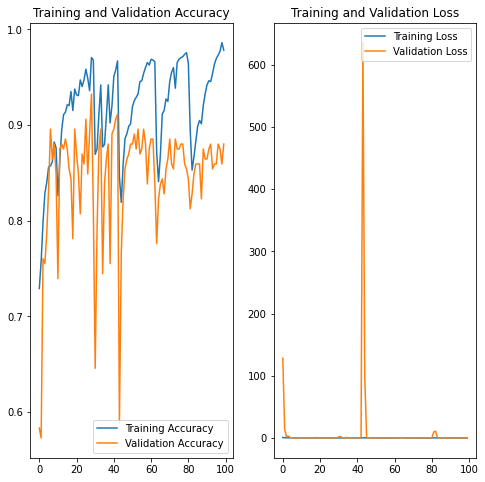

2278 374
Found 2278 images belonging to 2 classes.
Found 374 images belonging to 2 classes.
Epoch 1/100
71/71 [==============================] - 4s 51ms/step - loss: 0.7548 - accuracy: 0.7787 - val_loss: 2525.7529 - val_accuracy: 0.5000
Epoch 2/100
71/71 [==============================] - 3s 37ms/step - loss: 0.2393 - accuracy: 0.9270 - val_loss: 0.6525 - val_accuracy: 0.7045
Epoch 3/100
71/71 [==============================] - 3s 37ms/step - loss: 0.1175 - accuracy: 0.9662 - val_loss: 1.1804 - val_accuracy: 0.5085
Epoch 4/100
71/71 [==============================] - 3s 37ms/step - loss: 0.1018 - accuracy: 0.9653 - val_loss: 0.8633 - val_accuracy: 0.4943
Epoch 5/100
71/71 [==============================] - 3s 37ms/step - loss: 0.0647 - accuracy: 0.9760 - val_loss: 0.6550 - val_accuracy: 0.7812
Epoch 6/100
71/71 [==============================] - 3s 37ms/step - loss: 0.1891 - accuracy: 0.9430 - val_loss: 0.5220 - val_accuracy: 0.6960
Epoch 7/100
71/71 [==============================] - 

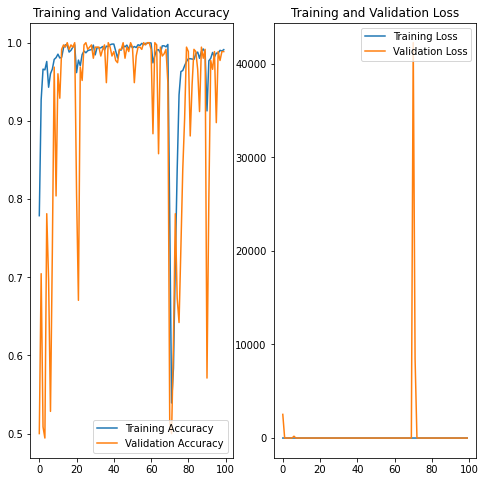

Found 1188 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
Epoch 1/100
37/37 [==============================] - 1s 40ms/step - loss: 1.4249 - accuracy: 0.5600 - val_loss: 4148.3149 - val_accuracy: 0.4792
Epoch 2/100
37/37 [==============================] - 1s 38ms/step - loss: 1.0062 - accuracy: 0.5069 - val_loss: 4596.7603 - val_accuracy: 0.5208
Epoch 3/100
37/37 [==============================] - 1s 39ms/step - loss: 0.8726 - accuracy: 0.5571 - val_loss: 299.3026 - val_accuracy: 0.5417
Epoch 4/100
37/37 [==============================] - 1s 38ms/step - loss: 0.8059 - accuracy: 0.5848 - val_loss: 87.0086 - val_accuracy: 0.5417
Epoch 5/100
37/37 [==============================] - 1s 38ms/step - loss: 0.7746 - accuracy: 0.5727 - val_loss: 18.4012 - val_accuracy: 0.6094
Epoch 6/100
37/37 [==============================] - 1s 38ms/step - loss: 0.7946 - accuracy: 0.4991 - val_loss: 9.8244 - val_accuracy: 0.5208
Epoch 7/100
37/37 [==============================] - 1s

Epoch 58/100
37/37 [==============================] - 1s 38ms/step - loss: 0.5287 - accuracy: 0.7405 - val_loss: 1.0287 - val_accuracy: 0.7135
Epoch 59/100
37/37 [==============================] - 1s 38ms/step - loss: 0.4902 - accuracy: 0.7690 - val_loss: 0.8671 - val_accuracy: 0.7604
Epoch 60/100
37/37 [==============================] - 1s 38ms/step - loss: 0.4843 - accuracy: 0.7950 - val_loss: 0.9806 - val_accuracy: 0.6979
Epoch 61/100
37/37 [==============================] - 1s 38ms/step - loss: 0.7273 - accuracy: 0.6894 - val_loss: 11.0386 - val_accuracy: 0.6146
Epoch 62/100
37/37 [==============================] - 1s 38ms/step - loss: 0.7098 - accuracy: 0.6946 - val_loss: 17.6581 - val_accuracy: 0.7188
Epoch 63/100
37/37 [==============================] - 1s 38ms/step - loss: 0.6006 - accuracy: 0.7336 - val_loss: 2.3169 - val_accuracy: 0.6927
Epoch 64/100
37/37 [==============================] - 1s 38ms/step - loss: 0.4867 - accuracy: 0.7578 - val_loss: 0.5739 - val_accuracy: 0.71

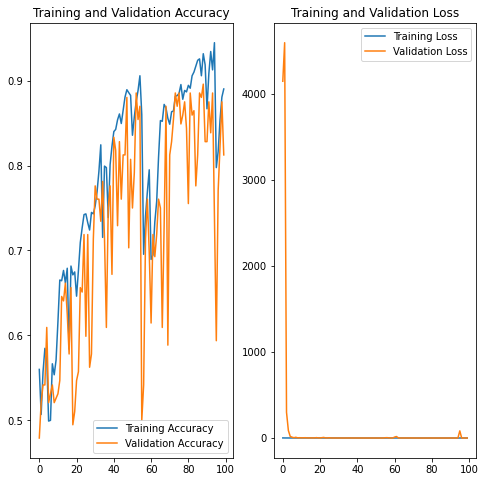

2278 374
Found 2278 images belonging to 2 classes.
Found 374 images belonging to 2 classes.
Epoch 1/100
71/71 [==============================] - 4s 51ms/step - loss: 0.4639 - accuracy: 0.8415 - val_loss: 90.8477 - val_accuracy: 0.4972
Epoch 2/100
71/71 [==============================] - 3s 36ms/step - loss: 0.1614 - accuracy: 0.9537 - val_loss: 0.7828 - val_accuracy: 0.5142
Epoch 3/100
71/71 [==============================] - 3s 36ms/step - loss: 0.0829 - accuracy: 0.9737 - val_loss: 0.6609 - val_accuracy: 0.5085
Epoch 4/100
71/71 [==============================] - 3s 36ms/step - loss: 0.0572 - accuracy: 0.9800 - val_loss: 0.6333 - val_accuracy: 0.6335
Epoch 5/100
71/71 [==============================] - 2s 35ms/step - loss: 0.0780 - accuracy: 0.9795 - val_loss: 0.6394 - val_accuracy: 0.8750
Epoch 6/100
71/71 [==============================] - 2s 35ms/step - loss: 0.1615 - accuracy: 0.9457 - val_loss: 4.5044 - val_accuracy: 0.5057
Epoch 7/100
71/71 [==============================] - 2s

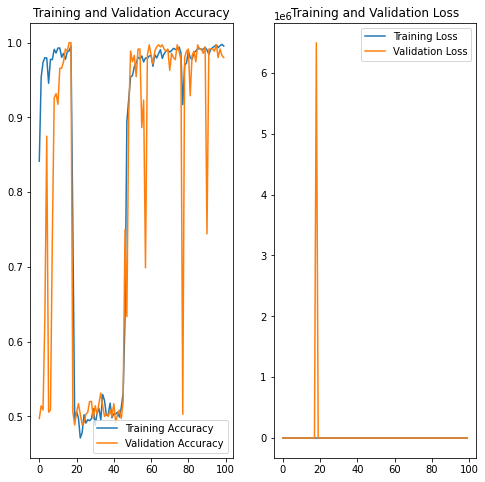

Found 1188 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
Epoch 1/100
37/37 [==============================] - 1s 37ms/step - loss: 0.8715 - accuracy: 0.7016 - val_loss: 85.3745 - val_accuracy: 0.3958
Epoch 2/100
37/37 [==============================] - 1s 36ms/step - loss: 0.5854 - accuracy: 0.7232 - val_loss: 1.0516 - val_accuracy: 0.6458
Epoch 3/100
37/37 [==============================] - 1s 36ms/step - loss: 0.4329 - accuracy: 0.8010 - val_loss: 0.4079 - val_accuracy: 0.8229
Epoch 4/100
37/37 [==============================] - 1s 35ms/step - loss: 0.3769 - accuracy: 0.8330 - val_loss: 0.4751 - val_accuracy: 0.8229
Epoch 5/100
37/37 [==============================] - 1s 35ms/step - loss: 0.3350 - accuracy: 0.8564 - val_loss: 0.3621 - val_accuracy: 0.8698
Epoch 6/100
37/37 [==============================] - 1s 35ms/step - loss: 0.3041 - accuracy: 0.8832 - val_loss: 0.2997 - val_accuracy: 0.8698
Epoch 7/100
37/37 [==============================] - 1s 36ms/ste

Epoch 58/100
37/37 [==============================] - 1s 35ms/step - loss: 0.2920 - accuracy: 0.8711 - val_loss: 0.5135 - val_accuracy: 0.8438
Epoch 59/100
37/37 [==============================] - 1s 35ms/step - loss: 0.2617 - accuracy: 0.8849 - val_loss: 0.4510 - val_accuracy: 0.8594
Epoch 60/100
37/37 [==============================] - 1s 36ms/step - loss: 0.2385 - accuracy: 0.9040 - val_loss: 0.3641 - val_accuracy: 0.8281
Epoch 61/100
37/37 [==============================] - 1s 35ms/step - loss: 0.2239 - accuracy: 0.9100 - val_loss: 0.4314 - val_accuracy: 0.8594
Epoch 62/100
37/37 [==============================] - 1s 35ms/step - loss: 0.1988 - accuracy: 0.9196 - val_loss: 0.4310 - val_accuracy: 0.8542
Epoch 63/100
37/37 [==============================] - 1s 35ms/step - loss: 0.2308 - accuracy: 0.8962 - val_loss: 0.3952 - val_accuracy: 0.8333
Epoch 64/100
37/37 [==============================] - 1s 35ms/step - loss: 0.2185 - accuracy: 0.9196 - val_loss: 0.4012 - val_accuracy: 0.8385

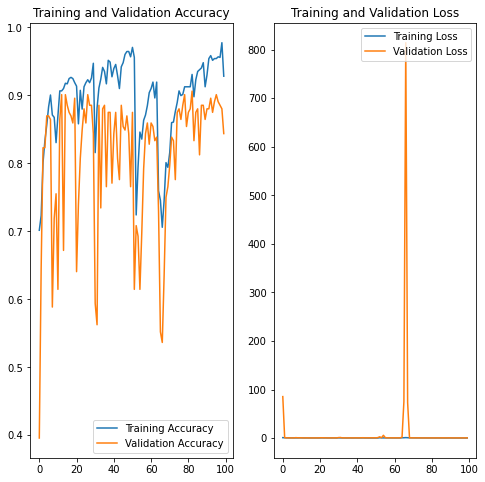

2278 374
Found 2278 images belonging to 2 classes.
Found 374 images belonging to 2 classes.
Epoch 1/100
71/71 [==============================] - 4s 50ms/step - loss: 0.3847 - accuracy: 0.8646 - val_loss: 2.6261 - val_accuracy: 0.4972
Epoch 2/100
71/71 [==============================] - 2s 35ms/step - loss: 0.1264 - accuracy: 0.9613 - val_loss: 0.6849 - val_accuracy: 0.5057
Epoch 3/100
71/71 [==============================] - 3s 35ms/step - loss: 0.1136 - accuracy: 0.9599 - val_loss: 1.3009 - val_accuracy: 0.5085
Epoch 4/100
71/71 [==============================] - 3s 35ms/step - loss: 0.0488 - accuracy: 0.9831 - val_loss: 1.5125 - val_accuracy: 0.4943
Epoch 5/100
71/71 [==============================] - 2s 35ms/step - loss: 0.0553 - accuracy: 0.9831 - val_loss: 0.6818 - val_accuracy: 0.5057
Epoch 6/100
71/71 [==============================] - 2s 35ms/step - loss: 0.0526 - accuracy: 0.9831 - val_loss: 0.6734 - val_accuracy: 0.5028
Epoch 7/100
71/71 [==============================] - 2s 

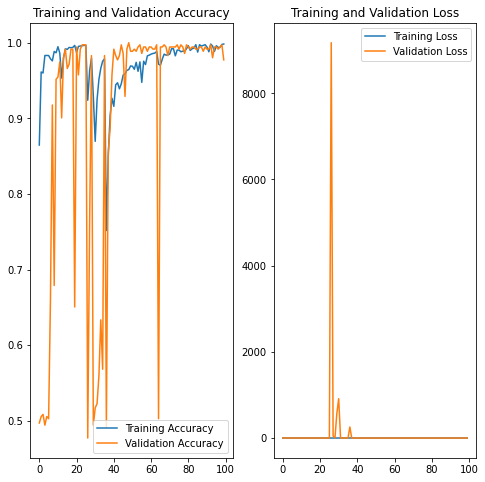

Found 1188 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
Epoch 1/100
37/37 [==============================] - 1s 37ms/step - loss: 1.4400 - accuracy: 0.5856 - val_loss: 240.8487 - val_accuracy: 0.5000
Epoch 2/100
37/37 [==============================] - 1s 36ms/step - loss: 1.3172 - accuracy: 0.5173 - val_loss: 4608.7339 - val_accuracy: 0.5208
Epoch 3/100
37/37 [==============================] - 1s 35ms/step - loss: 0.9606 - accuracy: 0.4775 - val_loss: 481.1183 - val_accuracy: 0.5260
Epoch 4/100
37/37 [==============================] - 1s 35ms/step - loss: 0.8512 - accuracy: 0.5225 - val_loss: 20.6267 - val_accuracy: 0.4635
Epoch 5/100
37/37 [==============================] - 1s 35ms/step - loss: 1.0290 - accuracy: 0.5173 - val_loss: 112.8454 - val_accuracy: 0.5052
Epoch 6/100
37/37 [==============================] - 1s 35ms/step - loss: 0.9083 - accuracy: 0.5190 - val_loss: 37.8162 - val_accuracy: 0.5000
Epoch 7/100
37/37 [==============================] - 1

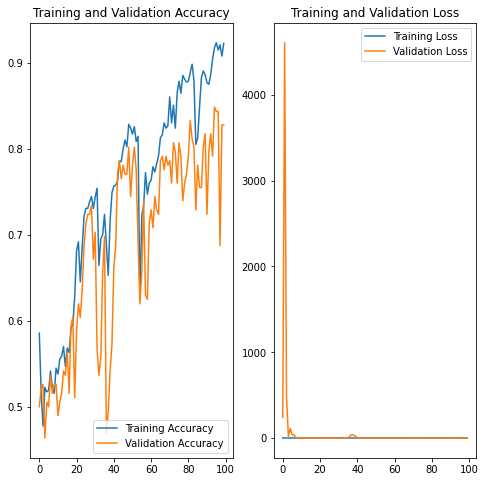

2278 374
Found 2278 images belonging to 2 classes.
Found 374 images belonging to 2 classes.
Epoch 1/100
71/71 [==============================] - 4s 51ms/step - loss: 0.3943 - accuracy: 0.8602 - val_loss: 0.7491 - val_accuracy: 0.5057
Epoch 2/100
71/71 [==============================] - 3s 35ms/step - loss: 0.1396 - accuracy: 0.9510 - val_loss: 0.6080 - val_accuracy: 0.8466
Epoch 3/100
71/71 [==============================] - 3s 36ms/step - loss: 0.0780 - accuracy: 0.9733 - val_loss: 1.3043 - val_accuracy: 0.5085
Epoch 4/100
71/71 [==============================] - 2s 35ms/step - loss: 0.0746 - accuracy: 0.9800 - val_loss: 3.1733 - val_accuracy: 0.4972
Epoch 5/100
71/71 [==============================] - 3s 36ms/step - loss: 0.0962 - accuracy: 0.9675 - val_loss: 0.5601 - val_accuracy: 0.9034
Epoch 6/100
71/71 [==============================] - 2s 35ms/step - loss: 0.0586 - accuracy: 0.9826 - val_loss: 1.1873 - val_accuracy: 0.5284
Epoch 7/100
71/71 [==============================] - 3s 

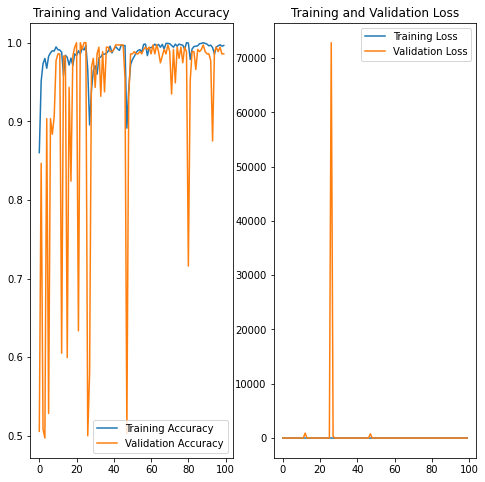

Found 1188 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
Epoch 1/100
37/37 [==============================] - 1s 37ms/step - loss: 1.0626 - accuracy: 0.6721 - val_loss: 5423.1665 - val_accuracy: 0.4792
Epoch 2/100
37/37 [==============================] - 1s 37ms/step - loss: 0.5913 - accuracy: 0.7024 - val_loss: 35232.5977 - val_accuracy: 0.4844
Epoch 3/100
37/37 [==============================] - 1s 37ms/step - loss: 0.6262 - accuracy: 0.6964 - val_loss: 6983.7656 - val_accuracy: 0.4792
Epoch 4/100
37/37 [==============================] - 1s 37ms/step - loss: 0.5806 - accuracy: 0.7362 - val_loss: 647.0574 - val_accuracy: 0.5417
Epoch 5/100
37/37 [==============================] - 1s 37ms/step - loss: 0.7655 - accuracy: 0.6765 - val_loss: 393.5199 - val_accuracy: 0.4844
Epoch 6/100
37/37 [==============================] - 1s 38ms/step - loss: 0.7286 - accuracy: 0.7206 - val_loss: 370.3360 - val_accuracy: 0.5104
Epoch 7/100
37/37 [==============================

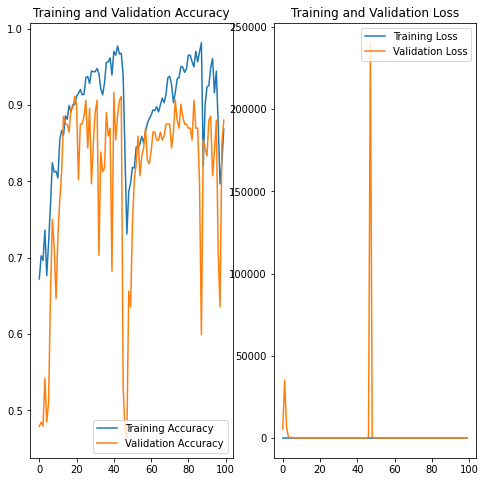

2278 374
Found 2278 images belonging to 2 classes.
Found 374 images belonging to 2 classes.
Epoch 1/100
71/71 [==============================] - 4s 50ms/step - loss: 0.6295 - accuracy: 0.8500 - val_loss: 0.6929 - val_accuracy: 0.5085
Epoch 2/100
71/71 [==============================] - 3s 35ms/step - loss: 0.1572 - accuracy: 0.9506 - val_loss: 0.7395 - val_accuracy: 0.5028
Epoch 3/100
71/71 [==============================] - 3s 36ms/step - loss: 0.0963 - accuracy: 0.9728 - val_loss: 0.6893 - val_accuracy: 0.5142
Epoch 4/100
71/71 [==============================] - 3s 36ms/step - loss: 0.0538 - accuracy: 0.9835 - val_loss: 0.6719 - val_accuracy: 0.8182
Epoch 5/100
71/71 [==============================] - 3s 36ms/step - loss: 0.0797 - accuracy: 0.9755 - val_loss: 0.6726 - val_accuracy: 0.4915
Epoch 6/100
71/71 [==============================] - 3s 36ms/step - loss: 0.0602 - accuracy: 0.9871 - val_loss: 0.4514 - val_accuracy: 0.7500
Epoch 7/100
71/71 [==============================] - 3s 

Epoch 58/100
71/71 [==============================] - 3s 36ms/step - loss: 0.0148 - accuracy: 0.9951 - val_loss: 0.0706 - val_accuracy: 0.9773
Epoch 59/100
71/71 [==============================] - 3s 36ms/step - loss: 0.0166 - accuracy: 0.9938 - val_loss: 0.0159 - val_accuracy: 0.9972
Epoch 60/100
71/71 [==============================] - 3s 36ms/step - loss: 0.0072 - accuracy: 0.9978 - val_loss: 0.0337 - val_accuracy: 0.9915
Epoch 61/100
71/71 [==============================] - 3s 36ms/step - loss: 0.0118 - accuracy: 0.9964 - val_loss: 0.0098 - val_accuracy: 0.9972
Epoch 62/100
71/71 [==============================] - 3s 37ms/step - loss: 0.0143 - accuracy: 0.9960 - val_loss: 0.1234 - val_accuracy: 0.9716
Epoch 63/100
71/71 [==============================] - 3s 36ms/step - loss: 0.0230 - accuracy: 0.9920 - val_loss: 0.0279 - val_accuracy: 0.9943
Epoch 64/100
71/71 [==============================] - 3s 37ms/step - loss: 0.0069 - accuracy: 0.9964 - val_loss: 0.0779 - val_accuracy: 0.9801

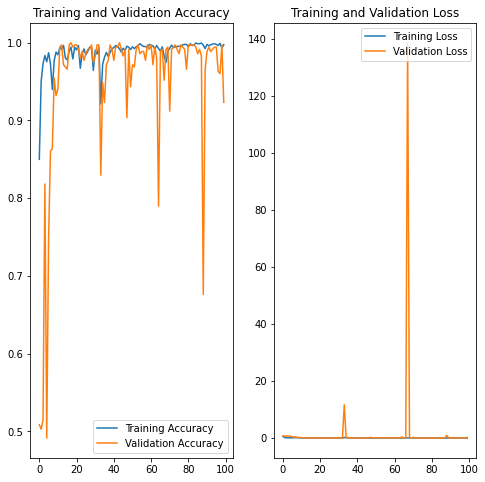

Found 1188 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
Epoch 1/100
37/37 [==============================] - 1s 38ms/step - loss: 1.1970 - accuracy: 0.7016 - val_loss: 28038.1406 - val_accuracy: 0.5156
Epoch 2/100
37/37 [==============================] - 1s 36ms/step - loss: 1.5921 - accuracy: 0.6583 - val_loss: 249779.5625 - val_accuracy: 0.4844
Epoch 3/100
37/37 [==============================] - 1s 36ms/step - loss: 0.8065 - accuracy: 0.6791 - val_loss: 112812.2812 - val_accuracy: 0.5208
Epoch 4/100
37/37 [==============================] - 1s 37ms/step - loss: 0.7003 - accuracy: 0.7067 - val_loss: 2630.7200 - val_accuracy: 0.5312
Epoch 5/100
37/37 [==============================] - 1s 37ms/step - loss: 0.6965 - accuracy: 0.7422 - val_loss: 58.1599 - val_accuracy: 0.6615
Epoch 6/100
37/37 [==============================] - 1s 37ms/step - loss: 0.6224 - accuracy: 0.7630 - val_loss: 22.9275 - val_accuracy: 0.7188
Epoch 7/100
37/37 [===========================

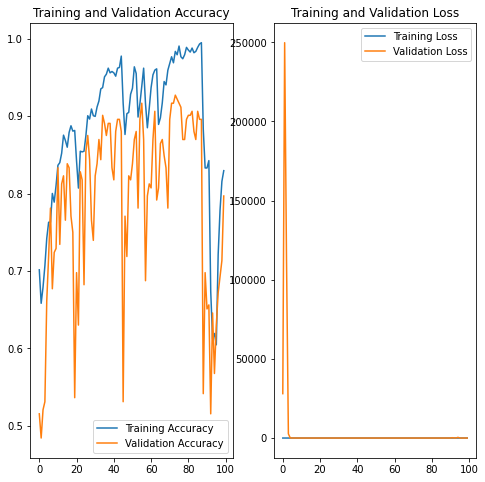

2278 374
Found 2278 images belonging to 2 classes.
Found 374 images belonging to 2 classes.
Epoch 1/100
71/71 [==============================] - 4s 51ms/step - loss: 0.5641 - accuracy: 0.8495 - val_loss: 47.6471 - val_accuracy: 0.5000
Epoch 2/100
71/71 [==============================] - 3s 36ms/step - loss: 0.1462 - accuracy: 0.9510 - val_loss: 0.6907 - val_accuracy: 0.5057
Epoch 3/100
71/71 [==============================] - 3s 37ms/step - loss: 0.1436 - accuracy: 0.9573 - val_loss: 0.6870 - val_accuracy: 0.5739
Epoch 4/100
71/71 [==============================] - 3s 36ms/step - loss: 0.0596 - accuracy: 0.9795 - val_loss: 0.6857 - val_accuracy: 0.4943
Epoch 5/100
71/71 [==============================] - 3s 36ms/step - loss: 0.0499 - accuracy: 0.9822 - val_loss: 0.6750 - val_accuracy: 0.5227
Epoch 6/100
71/71 [==============================] - 3s 36ms/step - loss: 0.0728 - accuracy: 0.9764 - val_loss: 0.6499 - val_accuracy: 0.7386
Epoch 7/100
71/71 [==============================] - 3s

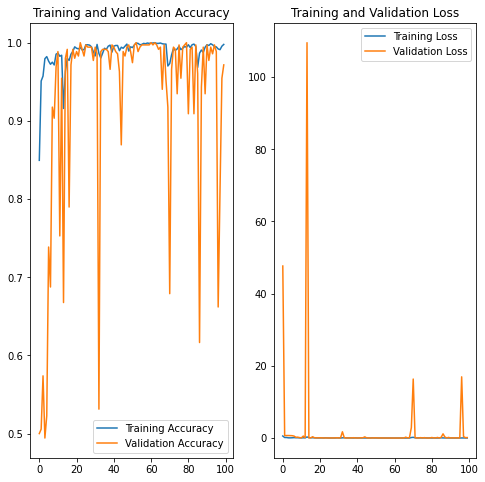

Found 1188 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
Epoch 1/100
37/37 [==============================] - 1s 39ms/step - loss: 0.8700 - accuracy: 0.7301 - val_loss: 31446.8125 - val_accuracy: 0.4740
Epoch 2/100
37/37 [==============================] - 1s 38ms/step - loss: 0.9550 - accuracy: 0.6341 - val_loss: 4080.3948 - val_accuracy: 0.4844
Epoch 3/100
37/37 [==============================] - 1s 38ms/step - loss: 1.2375 - accuracy: 0.5848 - val_loss: 7.1982 - val_accuracy: 0.5573
Epoch 4/100
37/37 [==============================] - 1s 38ms/step - loss: 0.8087 - accuracy: 0.6081 - val_loss: 771.8068 - val_accuracy: 0.4896
Epoch 5/100
37/37 [==============================] - 1s 37ms/step - loss: 0.9424 - accuracy: 0.6453 - val_loss: 0.6533 - val_accuracy: 0.5417
Epoch 6/100
37/37 [==============================] - 1s 37ms/step - loss: 0.7963 - accuracy: 0.6557 - val_loss: 18.8457 - val_accuracy: 0.5417
Epoch 7/100
37/37 [==============================] - 1s

Epoch 58/100
37/37 [==============================] - 1s 38ms/step - loss: 0.2968 - accuracy: 0.8953 - val_loss: 0.9773 - val_accuracy: 0.8281
Epoch 59/100
37/37 [==============================] - 1s 38ms/step - loss: 0.1834 - accuracy: 0.9317 - val_loss: 0.5315 - val_accuracy: 0.8490
Epoch 60/100
37/37 [==============================] - 1s 38ms/step - loss: 0.1380 - accuracy: 0.9438 - val_loss: 0.5518 - val_accuracy: 0.8802
Epoch 61/100
37/37 [==============================] - 1s 37ms/step - loss: 0.1169 - accuracy: 0.9567 - val_loss: 0.4135 - val_accuracy: 0.8906
Epoch 62/100
37/37 [==============================] - 1s 38ms/step - loss: 0.0684 - accuracy: 0.9827 - val_loss: 0.4734 - val_accuracy: 0.8802
Epoch 63/100
37/37 [==============================] - 1s 38ms/step - loss: 0.0578 - accuracy: 0.9792 - val_loss: 0.4353 - val_accuracy: 0.8854
Epoch 64/100
37/37 [==============================] - 1s 38ms/step - loss: 0.0642 - accuracy: 0.9801 - val_loss: 0.4151 - val_accuracy: 0.8750

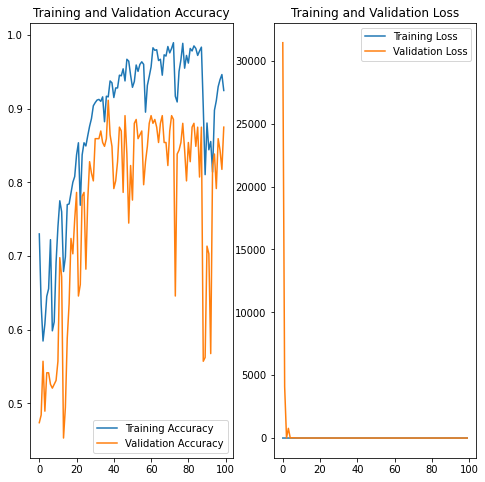

2278 374
Found 2278 images belonging to 2 classes.
Found 374 images belonging to 2 classes.
Epoch 1/100
71/71 [==============================] - 4s 52ms/step - loss: 0.3149 - accuracy: 0.8980 - val_loss: 6.9906 - val_accuracy: 0.4972
Epoch 2/100
71/71 [==============================] - 3s 38ms/step - loss: 0.1708 - accuracy: 0.9492 - val_loss: 0.6937 - val_accuracy: 0.5028
Epoch 3/100
71/71 [==============================] - 3s 38ms/step - loss: 0.1857 - accuracy: 0.9519 - val_loss: 0.8272 - val_accuracy: 0.5000
Epoch 4/100
71/71 [==============================] - 3s 38ms/step - loss: 0.0995 - accuracy: 0.9622 - val_loss: 0.6805 - val_accuracy: 0.4972
Epoch 5/100
71/71 [==============================] - 3s 37ms/step - loss: 0.0697 - accuracy: 0.9760 - val_loss: 0.6724 - val_accuracy: 0.5057
Epoch 6/100
71/71 [==============================] - 3s 38ms/step - loss: 0.0629 - accuracy: 0.9795 - val_loss: 0.6855 - val_accuracy: 0.5057
Epoch 7/100
71/71 [==============================] - 3s 

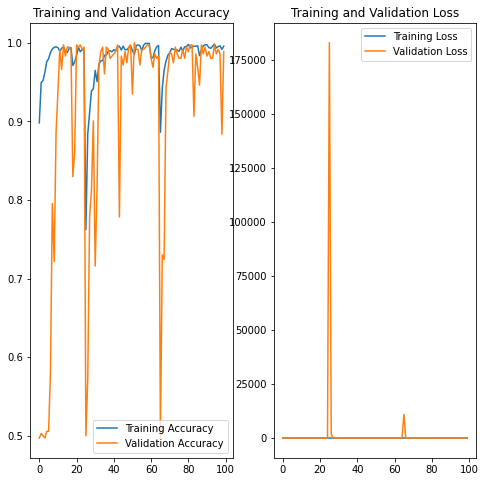

Found 1188 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
Epoch 1/100
37/37 [==============================] - 2s 41ms/step - loss: 1.5407 - accuracy: 0.6263 - val_loss: 1185.7593 - val_accuracy: 0.5260
Epoch 2/100
37/37 [==============================] - 1s 39ms/step - loss: 1.0021 - accuracy: 0.5554 - val_loss: 714.5281 - val_accuracy: 0.5417
Epoch 3/100
37/37 [==============================] - 1s 39ms/step - loss: 0.8062 - accuracy: 0.5709 - val_loss: 167.3183 - val_accuracy: 0.5781
Epoch 4/100
37/37 [==============================] - 1s 39ms/step - loss: 0.9492 - accuracy: 0.6151 - val_loss: 4.7545 - val_accuracy: 0.5312
Epoch 5/100
37/37 [==============================] - 1s 39ms/step - loss: 0.8486 - accuracy: 0.5978 - val_loss: 3.7874 - val_accuracy: 0.5417
Epoch 6/100
37/37 [==============================] - 1s 40ms/step - loss: 0.7496 - accuracy: 0.6514 - val_loss: 10.4670 - val_accuracy: 0.6510
Epoch 7/100
37/37 [==============================] - 1s 3

Epoch 58/100
37/37 [==============================] - 1s 39ms/step - loss: 0.3544 - accuracy: 0.8356 - val_loss: 0.4292 - val_accuracy: 0.7969
Epoch 59/100
37/37 [==============================] - 1s 40ms/step - loss: 0.2795 - accuracy: 0.8849 - val_loss: 0.3731 - val_accuracy: 0.8438
Epoch 60/100
37/37 [==============================] - 1s 39ms/step - loss: 0.2604 - accuracy: 0.8858 - val_loss: 0.3719 - val_accuracy: 0.8542
Epoch 61/100
37/37 [==============================] - 1s 39ms/step - loss: 0.2731 - accuracy: 0.8780 - val_loss: 0.3310 - val_accuracy: 0.8438
Epoch 62/100
37/37 [==============================] - 1s 39ms/step - loss: 0.2368 - accuracy: 0.9066 - val_loss: 0.3383 - val_accuracy: 0.8646
Epoch 63/100
37/37 [==============================] - 1s 39ms/step - loss: 0.2482 - accuracy: 0.8962 - val_loss: 0.3196 - val_accuracy: 0.8438
Epoch 64/100
37/37 [==============================] - 1s 40ms/step - loss: 0.2461 - accuracy: 0.9074 - val_loss: 0.6987 - val_accuracy: 0.7812

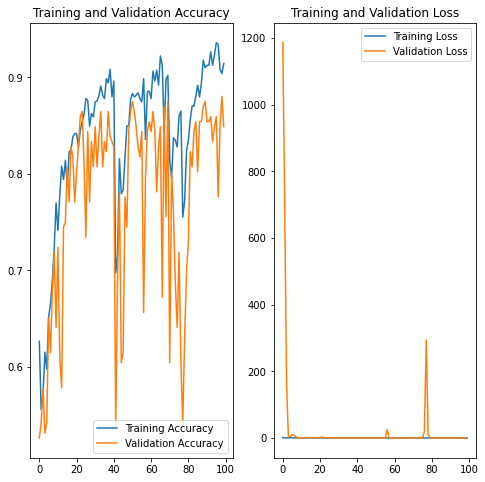

7min 1s ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


In [10]:
%%timeit -r 1 -n 10

path_train = path_base+'tr/'
path_val = path_base+'val/'

num_0_train = len(os.listdir(path_train+'0'))
num_1_train = len(os.listdir(path_train+'1'))

num_0_val = len(os.listdir(path_val+'0'))
num_1_val = len(os.listdir(path_val+'1'))

total_train = num_0_train + num_1_train
total_val = num_0_val + num_1_val

print(total_train, total_val)

# batch_size = 64
batch_size = 32
epochs = 100
IMG_HEIGHT = 32
IMG_WIDTH = 32

train_image_generator = ImageDataGenerator(rescale=1./255) # 学習データのジェネレータ
val_image_generator = ImageDataGenerator(rescale=1./255) # 検証データのジェネレータ
# predict_image_generator = ImageDataGenerator(rescale=1./255) # 予測データのジェネレータ

train_data_gen = train_image_generator.flow_from_directory(directory=path_train,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = val_image_generator.flow_from_directory(directory=path_val,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

input_tensor = Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))
base_model = tf.keras.applications.ResNet50(
    include_top=False, weights='imagenet', input_tensor=input_tensor, pooling='avg'
)

top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(1, activation='sigmoid'))


model = models.Model(inputs=base_model.input, outputs=top_model(base_model.output))

from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-3),
              metrics=['accuracy'])

# model.summary()




history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# with open('../data/acc/natural2(synthetic).txt', mode='a') as f:
#     f.write(str(val_acc[-1]) + '\n')

for l in model.layers[:-1]:
    l.trainable = False
# model.summary()

path_train = path_novel2+'tr/'
path_val = path_novel2+'val/'

num_0_train = len(os.listdir(path_train+'0'))
num_1_train = len(os.listdir(path_train+'1'))

num_0_val = len(os.listdir(path_val+'0'))
num_1_val = len(os.listdir(path_val+'1'))

total_train = num_0_train + num_1_train
total_val = num_0_val + num_1_val

train_image_generator = ImageDataGenerator(rescale=1./255) # 学習データのジェネレータ
val_image_generator = ImageDataGenerator(rescale=1./255) # 検証データのジェネレータ
# predict_image_generator = ImageDataGenerator(rescale=1./255) # 予測データのジェネレータ

train_data_gen = train_image_generator.flow_from_directory(directory=path_train,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = val_image_generator.flow_from_directory(directory=path_val,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')


history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# with open('../data/acc/natural2(natural).txt', mode='a') as f:
#     f.write(str(val_acc[-1]) + '\n')
prob.append(val_acc[-1])

2278 374
Found 2278 images belonging to 2 classes.
Found 374 images belonging to 2 classes.
Epoch 1/100
71/71 [==============================] - 4s 53ms/step - loss: 0.4219 - accuracy: 0.8842 - val_loss: 1.3959 - val_accuracy: 0.4972
Epoch 2/100
71/71 [==============================] - 3s 38ms/step - loss: 0.1231 - accuracy: 0.9577 - val_loss: 0.7078 - val_accuracy: 0.4943
Epoch 3/100
71/71 [==============================] - 3s 38ms/step - loss: 0.0815 - accuracy: 0.9786 - val_loss: 1.7995 - val_accuracy: 0.5000
Epoch 4/100
71/71 [==============================] - 3s 39ms/step - loss: 0.0735 - accuracy: 0.9782 - val_loss: 0.7027 - val_accuracy: 0.5142
Epoch 5/100
71/71 [==============================] - 3s 38ms/step - loss: 0.0582 - accuracy: 0.9786 - val_loss: 0.6332 - val_accuracy: 0.8352
Epoch 6/100
71/71 [==============================] - 3s 38ms/step - loss: 0.0482 - accuracy: 0.9822 - val_loss: 0.8984 - val_accuracy: 0.5085
Epoch 7/100
71/71 [==============================] - 3s 

Epoch 58/100
71/71 [==============================] - 3s 39ms/step - loss: 0.0246 - accuracy: 0.9915 - val_loss: 0.0232 - val_accuracy: 0.9972
Epoch 59/100
71/71 [==============================] - 3s 38ms/step - loss: 0.0049 - accuracy: 0.9982 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 60/100
71/71 [==============================] - 3s 38ms/step - loss: 0.0344 - accuracy: 0.9871 - val_loss: 6.4264 - val_accuracy: 0.5000
Epoch 61/100
71/71 [==============================] - 3s 38ms/step - loss: 0.0524 - accuracy: 0.9822 - val_loss: 1.4962 - val_accuracy: 0.8523
Epoch 62/100
71/71 [==============================] - 3s 38ms/step - loss: 0.0125 - accuracy: 0.9964 - val_loss: 0.0434 - val_accuracy: 0.9858
Epoch 63/100
71/71 [==============================] - 3s 38ms/step - loss: 0.0190 - accuracy: 0.9938 - val_loss: 0.0506 - val_accuracy: 0.9858
Epoch 64/100
71/71 [==============================] - 3s 39ms/step - loss: 0.0585 - accuracy: 0.9858 - val_loss: 27.1680 - val_accuracy: 0.556

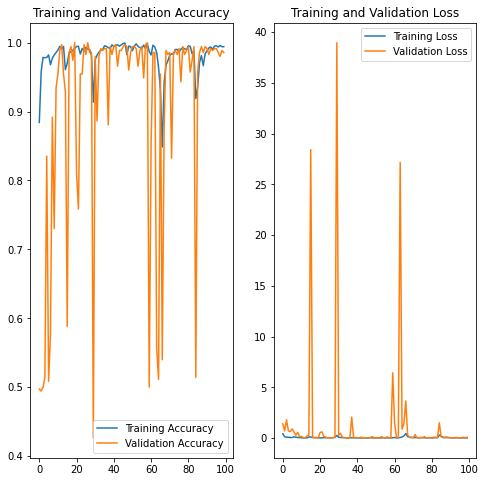

Found 1188 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
Epoch 1/100
37/37 [==============================] - 1s 40ms/step - loss: 1.3296 - accuracy: 0.5744 - val_loss: 84.4883 - val_accuracy: 0.5260
Epoch 2/100
37/37 [==============================] - 1s 39ms/step - loss: 0.7839 - accuracy: 0.4931 - val_loss: 782.9222 - val_accuracy: 0.4792
Epoch 3/100
37/37 [==============================] - 1s 39ms/step - loss: 1.0586 - accuracy: 0.4948 - val_loss: 167.1718 - val_accuracy: 0.5677
Epoch 4/100
37/37 [==============================] - 1s 40ms/step - loss: 0.8447 - accuracy: 0.4766 - val_loss: 12.0712 - val_accuracy: 0.5104
Epoch 5/100
37/37 [==============================] - 1s 39ms/step - loss: 0.7923 - accuracy: 0.4827 - val_loss: 2.2604 - val_accuracy: 0.5312
Epoch 6/100
37/37 [==============================] - 1s 39ms/step - loss: 0.7983 - accuracy: 0.4740 - val_loss: 0.7868 - val_accuracy: 0.4792
Epoch 7/100
37/37 [==============================] - 1s 38m

Epoch 58/100
37/37 [==============================] - 1s 40ms/step - loss: 0.3747 - accuracy: 0.8287 - val_loss: 0.4229 - val_accuracy: 0.8229
Epoch 59/100
37/37 [==============================] - 1s 39ms/step - loss: 0.3070 - accuracy: 0.8754 - val_loss: 0.4023 - val_accuracy: 0.8229
Epoch 60/100
37/37 [==============================] - 1s 39ms/step - loss: 0.2869 - accuracy: 0.8815 - val_loss: 0.4584 - val_accuracy: 0.7812
Epoch 61/100
37/37 [==============================] - 1s 39ms/step - loss: 0.3044 - accuracy: 0.8616 - val_loss: 0.3250 - val_accuracy: 0.8438
Epoch 62/100
37/37 [==============================] - 1s 40ms/step - loss: 0.2641 - accuracy: 0.8875 - val_loss: 0.3918 - val_accuracy: 0.7969
Epoch 63/100
37/37 [==============================] - 1s 39ms/step - loss: 0.2434 - accuracy: 0.9057 - val_loss: 0.3642 - val_accuracy: 0.8073
Epoch 64/100
37/37 [==============================] - 1s 39ms/step - loss: 0.2284 - accuracy: 0.9012 - val_loss: 0.5502 - val_accuracy: 0.7448

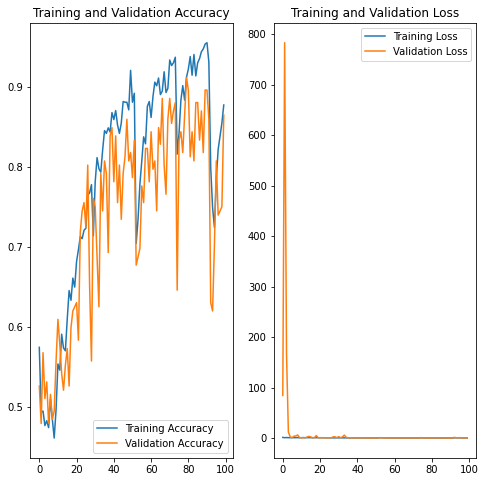

2278 374
Found 2278 images belonging to 2 classes.
Found 374 images belonging to 2 classes.
Epoch 1/100
71/71 [==============================] - 4s 52ms/step - loss: 0.4633 - accuracy: 0.8700 - val_loss: 7.3749 - val_accuracy: 0.4972
Epoch 2/100
71/71 [==============================] - 3s 39ms/step - loss: 0.2072 - accuracy: 0.9310 - val_loss: 0.6870 - val_accuracy: 0.5057
Epoch 3/100
71/71 [==============================] - 3s 38ms/step - loss: 0.0771 - accuracy: 0.9715 - val_loss: 0.6888 - val_accuracy: 0.5142
Epoch 4/100
71/71 [==============================] - 3s 38ms/step - loss: 0.0811 - accuracy: 0.9728 - val_loss: 0.6954 - val_accuracy: 0.4943
Epoch 5/100
71/71 [==============================] - 3s 38ms/step - loss: 0.0698 - accuracy: 0.9764 - val_loss: 0.6348 - val_accuracy: 0.5426
Epoch 6/100
71/71 [==============================] - 3s 39ms/step - loss: 0.0267 - accuracy: 0.9915 - val_loss: 0.6354 - val_accuracy: 0.5710
Epoch 7/100
71/71 [==============================] - 3s 

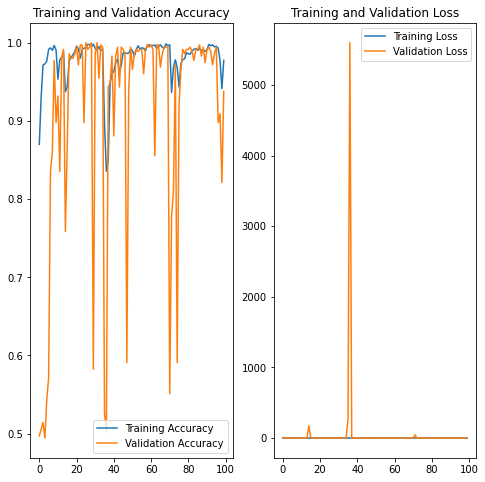

Found 1188 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
Epoch 1/100
37/37 [==============================] - 2s 41ms/step - loss: 0.8609 - accuracy: 0.7275 - val_loss: 1.2422 - val_accuracy: 0.5312
Epoch 2/100
37/37 [==============================] - 1s 39ms/step - loss: 0.5995 - accuracy: 0.7284 - val_loss: 0.5979 - val_accuracy: 0.6719
Epoch 3/100
37/37 [==============================] - 1s 39ms/step - loss: 0.6451 - accuracy: 0.7552 - val_loss: 37.1496 - val_accuracy: 0.5833
Epoch 4/100
37/37 [==============================] - 1s 39ms/step - loss: 0.7160 - accuracy: 0.7232 - val_loss: 6.1637 - val_accuracy: 0.6615
Epoch 5/100
37/37 [==============================] - 1s 39ms/step - loss: 0.7226 - accuracy: 0.7344 - val_loss: 470.5137 - val_accuracy: 0.5208
Epoch 6/100
37/37 [==============================] - 1s 39ms/step - loss: 0.5589 - accuracy: 0.7292 - val_loss: 3.4528 - val_accuracy: 0.6198
Epoch 7/100
37/37 [==============================] - 1s 39ms/s

Epoch 58/100
37/37 [==============================] - 1s 39ms/step - loss: 0.2308 - accuracy: 0.9040 - val_loss: 0.3304 - val_accuracy: 0.8802
Epoch 59/100
37/37 [==============================] - 1s 39ms/step - loss: 0.2076 - accuracy: 0.9126 - val_loss: 0.3159 - val_accuracy: 0.8750
Epoch 60/100
37/37 [==============================] - 1s 39ms/step - loss: 0.2236 - accuracy: 0.9074 - val_loss: 0.3660 - val_accuracy: 0.8542
Epoch 61/100
37/37 [==============================] - 1s 39ms/step - loss: 0.2320 - accuracy: 0.9005 - val_loss: 0.4387 - val_accuracy: 0.8385
Epoch 62/100
37/37 [==============================] - 1s 39ms/step - loss: 0.2220 - accuracy: 0.9152 - val_loss: 0.3834 - val_accuracy: 0.8750
Epoch 63/100
37/37 [==============================] - 1s 39ms/step - loss: 0.1935 - accuracy: 0.9325 - val_loss: 0.3197 - val_accuracy: 0.8750
Epoch 64/100
37/37 [==============================] - 1s 38ms/step - loss: 0.1560 - accuracy: 0.9386 - val_loss: 0.3807 - val_accuracy: 0.8542

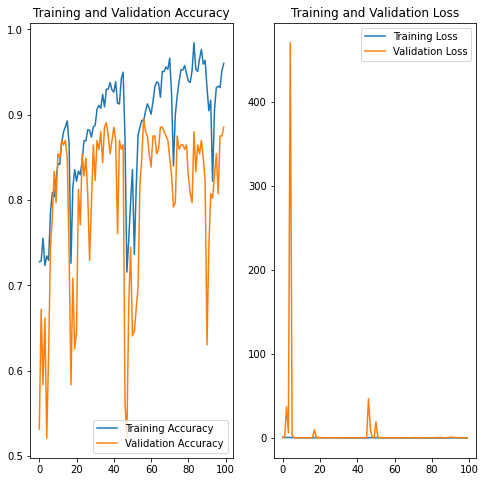

2278 374
Found 2278 images belonging to 2 classes.
Found 374 images belonging to 2 classes.
Epoch 1/100
71/71 [==============================] - 4s 52ms/step - loss: 0.4386 - accuracy: 0.8749 - val_loss: 12.8206 - val_accuracy: 0.5085
Epoch 2/100
71/71 [==============================] - 3s 39ms/step - loss: 0.2814 - accuracy: 0.8989 - val_loss: 2.7202 - val_accuracy: 0.5057
Epoch 3/100
71/71 [==============================] - 3s 38ms/step - loss: 0.2093 - accuracy: 0.9359 - val_loss: 0.6269 - val_accuracy: 0.5170
Epoch 4/100
71/71 [==============================] - 3s 39ms/step - loss: 0.1449 - accuracy: 0.9635 - val_loss: 2.2231 - val_accuracy: 0.4972
Epoch 5/100
71/71 [==============================] - 3s 38ms/step - loss: 0.0768 - accuracy: 0.9760 - val_loss: 0.7548 - val_accuracy: 0.5057
Epoch 6/100
71/71 [==============================] - 3s 39ms/step - loss: 0.0607 - accuracy: 0.9831 - val_loss: 0.5539 - val_accuracy: 0.9318
Epoch 7/100
71/71 [==============================] - 3s

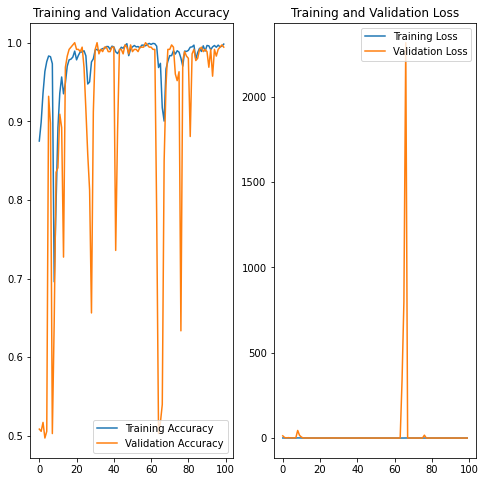

Found 1188 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
Epoch 1/100
37/37 [==============================] - 2s 42ms/step - loss: 1.4270 - accuracy: 0.5978 - val_loss: 51527.1875 - val_accuracy: 0.4792
Epoch 2/100
37/37 [==============================] - 1s 39ms/step - loss: 0.9935 - accuracy: 0.4862 - val_loss: 633.6600 - val_accuracy: 0.4740
Epoch 3/100
37/37 [==============================] - 1s 39ms/step - loss: 0.7886 - accuracy: 0.5208 - val_loss: 1168.2167 - val_accuracy: 0.4688
Epoch 4/100
37/37 [==============================] - 1s 40ms/step - loss: 1.1201 - accuracy: 0.5199 - val_loss: 265.2967 - val_accuracy: 0.4844
Epoch 5/100
37/37 [==============================] - 1s 39ms/step - loss: 0.9462 - accuracy: 0.5294 - val_loss: 40.5414 - val_accuracy: 0.4792
Epoch 6/100
37/37 [==============================] - 1s 40ms/step - loss: 0.7774 - accuracy: 0.5536 - val_loss: 0.7238 - val_accuracy: 0.4792
Epoch 7/100
37/37 [==============================] - 

Epoch 58/100
37/37 [==============================] - 1s 39ms/step - loss: 0.2815 - accuracy: 0.8849 - val_loss: 0.6284 - val_accuracy: 0.8229
Epoch 59/100
37/37 [==============================] - 1s 39ms/step - loss: 0.2369 - accuracy: 0.9048 - val_loss: 0.6521 - val_accuracy: 0.8490
Epoch 60/100
37/37 [==============================] - 1s 39ms/step - loss: 0.2855 - accuracy: 0.8988 - val_loss: 0.4900 - val_accuracy: 0.8490
Epoch 61/100
37/37 [==============================] - 1s 40ms/step - loss: 0.3001 - accuracy: 0.9092 - val_loss: 0.9221 - val_accuracy: 0.6979
Epoch 62/100
37/37 [==============================] - 1s 39ms/step - loss: 0.3124 - accuracy: 0.8702 - val_loss: 0.4426 - val_accuracy: 0.8229
Epoch 63/100
37/37 [==============================] - 1s 40ms/step - loss: 0.2397 - accuracy: 0.8988 - val_loss: 0.4635 - val_accuracy: 0.8333
Epoch 64/100
37/37 [==============================] - 1s 39ms/step - loss: 0.1877 - accuracy: 0.9247 - val_loss: 0.3895 - val_accuracy: 0.8542

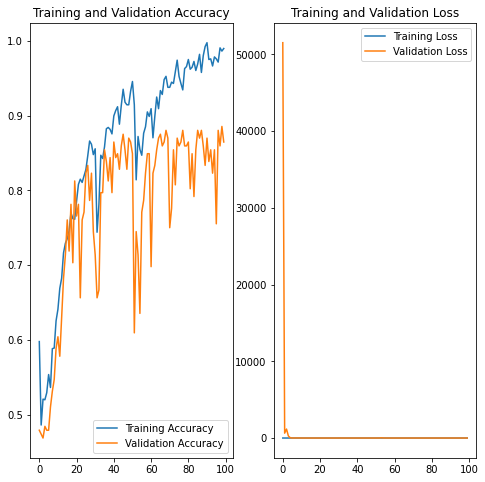

2278 374
Found 2278 images belonging to 2 classes.
Found 374 images belonging to 2 classes.
Epoch 1/100
71/71 [==============================] - 4s 52ms/step - loss: 0.5323 - accuracy: 0.8326 - val_loss: 0.8120 - val_accuracy: 0.5028
Epoch 2/100
71/71 [==============================] - 3s 39ms/step - loss: 0.1159 - accuracy: 0.9595 - val_loss: 0.7286 - val_accuracy: 0.5057
Epoch 3/100
71/71 [==============================] - 3s 39ms/step - loss: 0.0838 - accuracy: 0.9693 - val_loss: 1.6041 - val_accuracy: 0.5057
Epoch 4/100
71/71 [==============================] - 3s 38ms/step - loss: 0.0791 - accuracy: 0.9706 - val_loss: 0.7206 - val_accuracy: 0.4943
Epoch 5/100
71/71 [==============================] - 3s 38ms/step - loss: 0.0509 - accuracy: 0.9875 - val_loss: 1.0238 - val_accuracy: 0.5028
Epoch 6/100
71/71 [==============================] - 3s 38ms/step - loss: 0.0490 - accuracy: 0.9880 - val_loss: 0.8033 - val_accuracy: 0.5398
Epoch 7/100
71/71 [==============================] - 3s 

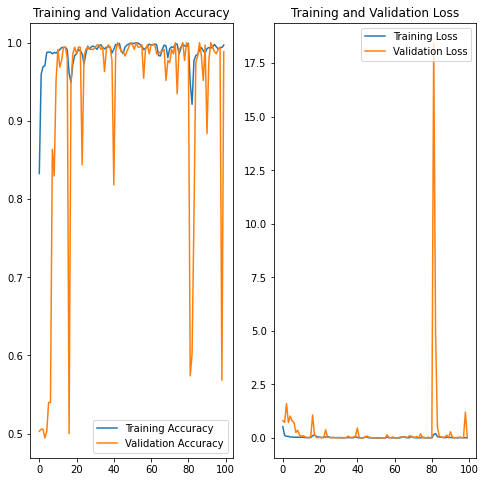

Found 1188 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
Epoch 1/100
37/37 [==============================] - 1s 39ms/step - loss: 0.6180 - accuracy: 0.8114 - val_loss: 2.7015 - val_accuracy: 0.8281
Epoch 2/100
37/37 [==============================] - 1s 39ms/step - loss: 0.7804 - accuracy: 0.7517 - val_loss: 8.0242 - val_accuracy: 0.4740
Epoch 3/100
37/37 [==============================] - 1s 39ms/step - loss: 1.0622 - accuracy: 0.4965 - val_loss: 1704.5153 - val_accuracy: 0.5208
Epoch 4/100
37/37 [==============================] - 1s 39ms/step - loss: 1.1077 - accuracy: 0.5009 - val_loss: 1486.7406 - val_accuracy: 0.5260
Epoch 5/100
37/37 [==============================] - 1s 39ms/step - loss: 0.8104 - accuracy: 0.5381 - val_loss: 227.1276 - val_accuracy: 0.4792
Epoch 6/100
37/37 [==============================] - 1s 39ms/step - loss: 0.7836 - accuracy: 0.5431 - val_loss: 35.3678 - val_accuracy: 0.4740
Epoch 7/100
37/37 [==============================] - 1s 

Epoch 58/100
37/37 [==============================] - 1s 39ms/step - loss: 0.4029 - accuracy: 0.8036 - val_loss: 0.6551 - val_accuracy: 0.6250
Epoch 59/100
37/37 [==============================] - 1s 39ms/step - loss: 0.3414 - accuracy: 0.8659 - val_loss: 0.5962 - val_accuracy: 0.7083
Epoch 60/100
37/37 [==============================] - 1s 39ms/step - loss: 0.3471 - accuracy: 0.8452 - val_loss: 0.3917 - val_accuracy: 0.8229
Epoch 61/100
37/37 [==============================] - 1s 39ms/step - loss: 0.2831 - accuracy: 0.8772 - val_loss: 0.4643 - val_accuracy: 0.8229
Epoch 62/100
37/37 [==============================] - 1s 39ms/step - loss: 0.3140 - accuracy: 0.8737 - val_loss: 0.5004 - val_accuracy: 0.7292
Epoch 63/100
37/37 [==============================] - 1s 39ms/step - loss: 0.3142 - accuracy: 0.8581 - val_loss: 0.3417 - val_accuracy: 0.8229
Epoch 64/100
37/37 [==============================] - 1s 39ms/step - loss: 0.2481 - accuracy: 0.8988 - val_loss: 0.3261 - val_accuracy: 0.8490

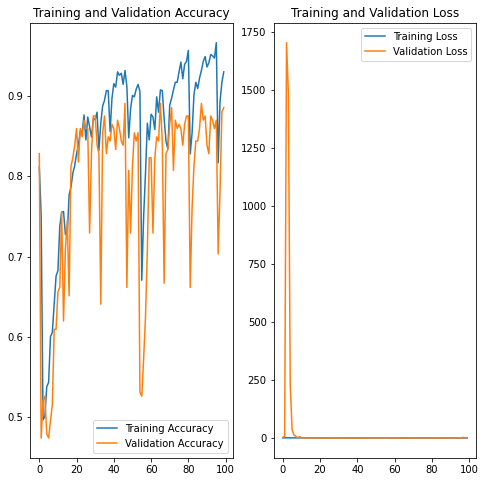

2278 374
Found 2278 images belonging to 2 classes.
Found 374 images belonging to 2 classes.
Epoch 1/100
71/71 [==============================] - 4s 51ms/step - loss: 0.5531 - accuracy: 0.8188 - val_loss: 0.8552 - val_accuracy: 0.5028
Epoch 2/100
71/71 [==============================] - 3s 39ms/step - loss: 0.1991 - accuracy: 0.9426 - val_loss: 0.6825 - val_accuracy: 0.5312
Epoch 3/100
71/71 [==============================] - 3s 39ms/step - loss: 0.0965 - accuracy: 0.9697 - val_loss: 0.7523 - val_accuracy: 0.5000
Epoch 4/100
71/71 [==============================] - 3s 39ms/step - loss: 0.0572 - accuracy: 0.9817 - val_loss: 0.6818 - val_accuracy: 0.5142
Epoch 5/100
71/71 [==============================] - 3s 39ms/step - loss: 0.0472 - accuracy: 0.9880 - val_loss: 0.6833 - val_accuracy: 0.5114
Epoch 6/100
71/71 [==============================] - 3s 39ms/step - loss: 0.0857 - accuracy: 0.9755 - val_loss: 0.7169 - val_accuracy: 0.4972
Epoch 7/100
71/71 [==============================] - 3s 

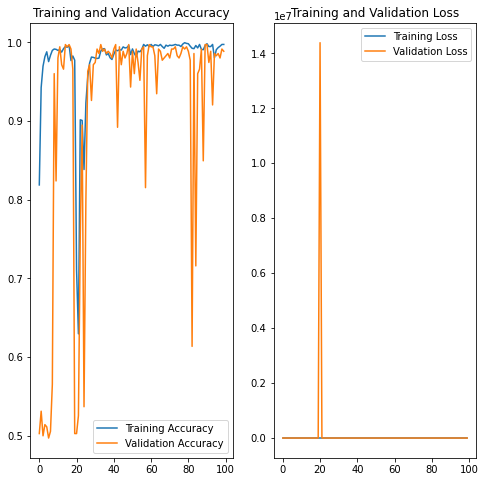

Found 1188 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
Epoch 1/100
37/37 [==============================] - 1s 39ms/step - loss: 1.0187 - accuracy: 0.7604 - val_loss: 76.6209 - val_accuracy: 0.5312
Epoch 2/100
37/37 [==============================] - 1s 39ms/step - loss: 0.6033 - accuracy: 0.7500 - val_loss: 40.0663 - val_accuracy: 0.7292
Epoch 3/100
37/37 [==============================] - 1s 40ms/step - loss: 0.4648 - accuracy: 0.8002 - val_loss: 0.7944 - val_accuracy: 0.6406
Epoch 4/100
37/37 [==============================] - 1s 39ms/step - loss: 0.3844 - accuracy: 0.8400 - val_loss: 1.6550 - val_accuracy: 0.8490
Epoch 5/100
37/37 [==============================] - 1s 39ms/step - loss: 0.5696 - accuracy: 0.7535 - val_loss: 1.1182 - val_accuracy: 0.4948
Epoch 6/100
37/37 [==============================] - 1s 39ms/step - loss: 0.4327 - accuracy: 0.7881 - val_loss: 0.6413 - val_accuracy: 0.6510
Epoch 7/100
37/37 [==============================] - 1s 38ms/st

Epoch 58/100
37/37 [==============================] - 1s 39ms/step - loss: 0.1082 - accuracy: 0.9637 - val_loss: 0.4638 - val_accuracy: 0.8438
Epoch 59/100
37/37 [==============================] - 1s 39ms/step - loss: 0.1031 - accuracy: 0.9619 - val_loss: 0.3298 - val_accuracy: 0.8854
Epoch 60/100
37/37 [==============================] - 1s 39ms/step - loss: 0.0866 - accuracy: 0.9740 - val_loss: 0.4108 - val_accuracy: 0.8646
Epoch 61/100
37/37 [==============================] - 1s 39ms/step - loss: 0.0984 - accuracy: 0.9619 - val_loss: 0.3814 - val_accuracy: 0.8698
Epoch 62/100
37/37 [==============================] - 1s 39ms/step - loss: 0.0839 - accuracy: 0.9671 - val_loss: 0.4639 - val_accuracy: 0.8490
Epoch 63/100
37/37 [==============================] - 1s 39ms/step - loss: 0.0736 - accuracy: 0.9766 - val_loss: 0.3681 - val_accuracy: 0.8958
Epoch 64/100
37/37 [==============================] - 1s 39ms/step - loss: 0.0573 - accuracy: 0.9853 - val_loss: 0.3490 - val_accuracy: 0.8854

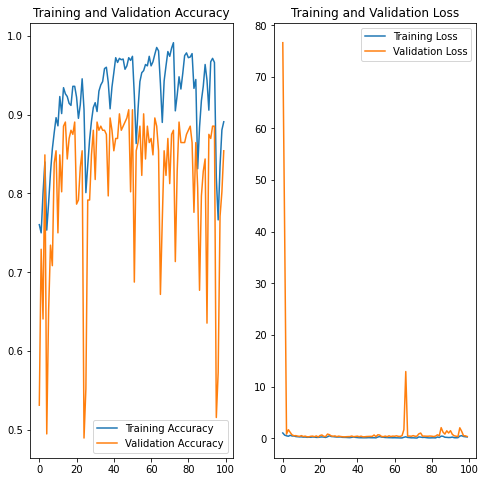

2278 374
Found 2278 images belonging to 2 classes.
Found 374 images belonging to 2 classes.
Epoch 1/100
71/71 [==============================] - 4s 52ms/step - loss: 0.3347 - accuracy: 0.8833 - val_loss: 1.9759 - val_accuracy: 0.5000
Epoch 2/100
71/71 [==============================] - 3s 39ms/step - loss: 0.2016 - accuracy: 0.9359 - val_loss: 0.7009 - val_accuracy: 0.5057
Epoch 3/100
71/71 [==============================] - 3s 39ms/step - loss: 0.1082 - accuracy: 0.9622 - val_loss: 1.2117 - val_accuracy: 0.4943
Epoch 4/100
71/71 [==============================] - 3s 39ms/step - loss: 0.0702 - accuracy: 0.9764 - val_loss: 0.7504 - val_accuracy: 0.4972
Epoch 5/100
71/71 [==============================] - 3s 39ms/step - loss: 0.0542 - accuracy: 0.9858 - val_loss: 0.6560 - val_accuracy: 0.6648
Epoch 6/100
71/71 [==============================] - 3s 38ms/step - loss: 0.0436 - accuracy: 0.9875 - val_loss: 0.5942 - val_accuracy: 0.6648
Epoch 7/100
71/71 [==============================] - 3s 

Epoch 58/100
71/71 [==============================] - 3s 39ms/step - loss: 0.0202 - accuracy: 0.9929 - val_loss: 0.0742 - val_accuracy: 0.9744
Epoch 59/100
71/71 [==============================] - 3s 39ms/step - loss: 0.0205 - accuracy: 0.9930 - val_loss: 0.0195 - val_accuracy: 0.9915
Epoch 60/100
71/71 [==============================] - 3s 39ms/step - loss: 0.0148 - accuracy: 0.9951 - val_loss: 0.0178 - val_accuracy: 0.9915
Epoch 61/100
71/71 [==============================] - 3s 39ms/step - loss: 0.0178 - accuracy: 0.9924 - val_loss: 0.0176 - val_accuracy: 0.9943
Epoch 62/100
71/71 [==============================] - 3s 39ms/step - loss: 0.0230 - accuracy: 0.9929 - val_loss: 0.0145 - val_accuracy: 0.9972
Epoch 63/100
71/71 [==============================] - 3s 39ms/step - loss: 0.0163 - accuracy: 0.9951 - val_loss: 0.0095 - val_accuracy: 0.9972
Epoch 64/100
71/71 [==============================] - 3s 39ms/step - loss: 0.0091 - accuracy: 0.9973 - val_loss: 0.0150 - val_accuracy: 0.9915

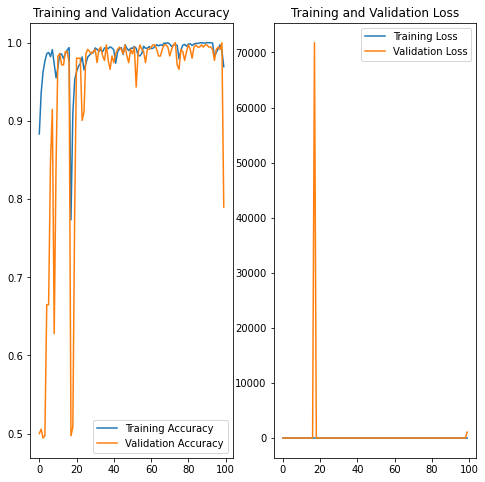

Found 1188 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
Epoch 1/100
37/37 [==============================] - 1s 40ms/step - loss: 0.6172 - accuracy: 0.7353 - val_loss: 3232.4827 - val_accuracy: 0.5156
Epoch 2/100
37/37 [==============================] - 1s 40ms/step - loss: 0.4895 - accuracy: 0.7638 - val_loss: 16.2954 - val_accuracy: 0.6667
Epoch 3/100
37/37 [==============================] - 1s 38ms/step - loss: 0.6655 - accuracy: 0.7388 - val_loss: 3.7731 - val_accuracy: 0.7448
Epoch 4/100
37/37 [==============================] - 1s 39ms/step - loss: 0.5959 - accuracy: 0.7612 - val_loss: 1.5012 - val_accuracy: 0.5677
Epoch 5/100
37/37 [==============================] - 1s 39ms/step - loss: 0.5298 - accuracy: 0.7777 - val_loss: 2.1116 - val_accuracy: 0.5781
Epoch 6/100
37/37 [==============================] - 1s 39ms/step - loss: 0.4490 - accuracy: 0.8106 - val_loss: 1.1906 - val_accuracy: 0.6979
Epoch 7/100
37/37 [==============================] - 1s 39ms/

Epoch 58/100
37/37 [==============================] - 1s 40ms/step - loss: 0.1653 - accuracy: 0.9412 - val_loss: 0.3853 - val_accuracy: 0.8333
Epoch 59/100
37/37 [==============================] - 1s 39ms/step - loss: 0.2163 - accuracy: 0.9126 - val_loss: 0.3067 - val_accuracy: 0.8594
Epoch 60/100
37/37 [==============================] - 1s 39ms/step - loss: 0.1555 - accuracy: 0.9420 - val_loss: 0.2790 - val_accuracy: 0.8906
Epoch 61/100
37/37 [==============================] - 1s 40ms/step - loss: 0.1202 - accuracy: 0.9576 - val_loss: 0.2705 - val_accuracy: 0.8854
Epoch 62/100
37/37 [==============================] - 1s 39ms/step - loss: 0.1201 - accuracy: 0.9542 - val_loss: 0.3050 - val_accuracy: 0.8802
Epoch 63/100
37/37 [==============================] - 1s 39ms/step - loss: 0.1018 - accuracy: 0.9576 - val_loss: 0.2989 - val_accuracy: 0.8802
Epoch 64/100
37/37 [==============================] - 1s 39ms/step - loss: 0.1690 - accuracy: 0.9403 - val_loss: 0.2793 - val_accuracy: 0.8802

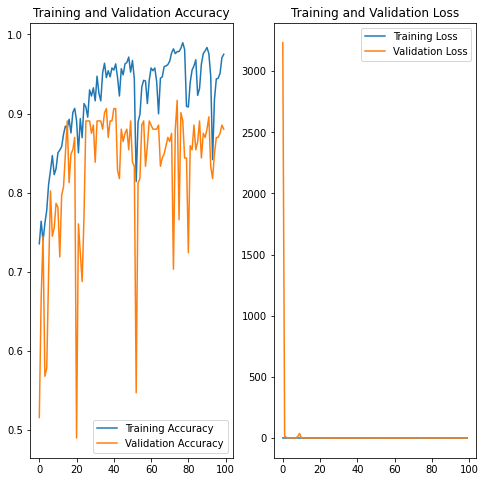

2278 374
Found 2278 images belonging to 2 classes.
Found 374 images belonging to 2 classes.
Epoch 1/100
71/71 [==============================] - 4s 51ms/step - loss: 0.4919 - accuracy: 0.8615 - val_loss: 0.7619 - val_accuracy: 0.5028
Epoch 2/100
71/71 [==============================] - 3s 38ms/step - loss: 0.1198 - accuracy: 0.9630 - val_loss: 0.9635 - val_accuracy: 0.5085
Epoch 3/100
71/71 [==============================] - 3s 38ms/step - loss: 0.1238 - accuracy: 0.9613 - val_loss: 1.0548 - val_accuracy: 0.5000
Epoch 4/100
71/71 [==============================] - 3s 38ms/step - loss: 0.1220 - accuracy: 0.9742 - val_loss: 1.3620 - val_accuracy: 0.5000
Epoch 5/100
71/71 [==============================] - 3s 38ms/step - loss: 0.0613 - accuracy: 0.9804 - val_loss: 0.6730 - val_accuracy: 0.5000
Epoch 6/100
71/71 [==============================] - 3s 38ms/step - loss: 0.0357 - accuracy: 0.9898 - val_loss: 0.8681 - val_accuracy: 0.5312
Epoch 7/100
71/71 [==============================] - 3s 

Epoch 58/100
71/71 [==============================] - 3s 38ms/step - loss: 8.6871e-04 - accuracy: 0.9996 - val_loss: 0.0282 - val_accuracy: 0.9915
Epoch 59/100
71/71 [==============================] - 3s 38ms/step - loss: 0.0311 - accuracy: 0.9920 - val_loss: 0.0166 - val_accuracy: 0.9972
Epoch 60/100
71/71 [==============================] - 3s 38ms/step - loss: 0.0093 - accuracy: 0.9969 - val_loss: 0.0185 - val_accuracy: 0.9943
Epoch 61/100
71/71 [==============================] - 3s 38ms/step - loss: 0.0150 - accuracy: 0.9969 - val_loss: 0.0173 - val_accuracy: 0.9915
Epoch 62/100
71/71 [==============================] - 3s 38ms/step - loss: 0.0101 - accuracy: 0.9960 - val_loss: 0.0400 - val_accuracy: 0.9858
Epoch 63/100
71/71 [==============================] - 3s 38ms/step - loss: 0.0118 - accuracy: 0.9956 - val_loss: 0.0104 - val_accuracy: 0.9972
Epoch 64/100
71/71 [==============================] - 3s 38ms/step - loss: 0.0077 - accuracy: 0.9969 - val_loss: 0.0241 - val_accuracy: 0.

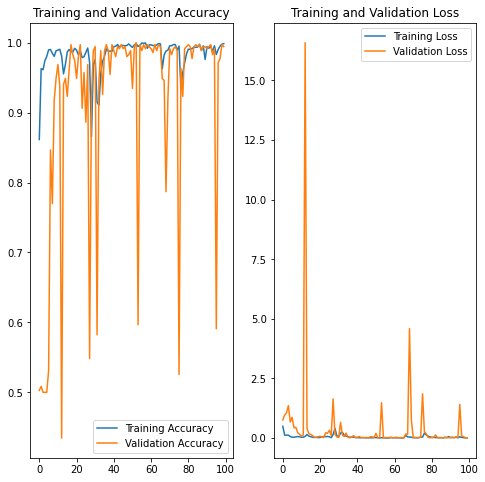

Found 1188 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
Epoch 1/100
37/37 [==============================] - 1s 40ms/step - loss: 0.7053 - accuracy: 0.7561 - val_loss: 0.6414 - val_accuracy: 0.6458
Epoch 2/100
37/37 [==============================] - 1s 39ms/step - loss: 0.3972 - accuracy: 0.8080 - val_loss: 0.3752 - val_accuracy: 0.8177
Epoch 3/100
37/37 [==============================] - 1s 39ms/step - loss: 0.3671 - accuracy: 0.8521 - val_loss: 0.6491 - val_accuracy: 0.7500
Epoch 4/100
37/37 [==============================] - 1s 39ms/step - loss: 0.4282 - accuracy: 0.8157 - val_loss: 0.5720 - val_accuracy: 0.7500
Epoch 5/100
37/37 [==============================] - 1s 39ms/step - loss: 0.3639 - accuracy: 0.8382 - val_loss: 0.4716 - val_accuracy: 0.7448
Epoch 6/100
37/37 [==============================] - 1s 39ms/step - loss: 0.3364 - accuracy: 0.8659 - val_loss: 0.5794 - val_accuracy: 0.7292
Epoch 7/100
37/37 [==============================] - 1s 39ms/step

Epoch 58/100
37/37 [==============================] - 1s 37ms/step - loss: 0.0393 - accuracy: 0.9922 - val_loss: 0.2829 - val_accuracy: 0.9115
Epoch 59/100
37/37 [==============================] - 1s 38ms/step - loss: 0.0379 - accuracy: 0.9879 - val_loss: 0.4049 - val_accuracy: 0.8854
Epoch 60/100
37/37 [==============================] - 1s 37ms/step - loss: 0.0441 - accuracy: 0.9827 - val_loss: 0.3401 - val_accuracy: 0.9115
Epoch 61/100
37/37 [==============================] - 1s 37ms/step - loss: 0.0593 - accuracy: 0.9862 - val_loss: 0.3890 - val_accuracy: 0.8958
Epoch 62/100
37/37 [==============================] - 1s 37ms/step - loss: 0.0312 - accuracy: 0.9905 - val_loss: 0.4532 - val_accuracy: 0.8698
Epoch 63/100
37/37 [==============================] - 1s 38ms/step - loss: 0.0337 - accuracy: 0.9896 - val_loss: 0.4180 - val_accuracy: 0.9062
Epoch 64/100
37/37 [==============================] - 1s 38ms/step - loss: 0.0269 - accuracy: 0.9931 - val_loss: 0.3684 - val_accuracy: 0.9115

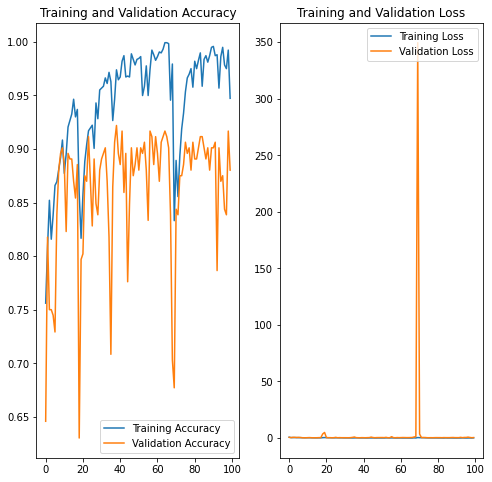

2278 374
Found 2278 images belonging to 2 classes.
Found 374 images belonging to 2 classes.
Epoch 1/100
71/71 [==============================] - 4s 54ms/step - loss: 0.3549 - accuracy: 0.8816 - val_loss: 66.0367 - val_accuracy: 0.5000
Epoch 2/100
71/71 [==============================] - 3s 38ms/step - loss: 0.1047 - accuracy: 0.9648 - val_loss: 0.7063 - val_accuracy: 0.4915
Epoch 3/100
71/71 [==============================] - 3s 38ms/step - loss: 0.0615 - accuracy: 0.9822 - val_loss: 0.7263 - val_accuracy: 0.5028
Epoch 4/100
71/71 [==============================] - 3s 37ms/step - loss: 0.0833 - accuracy: 0.9684 - val_loss: 0.6904 - val_accuracy: 0.5426
Epoch 5/100
71/71 [==============================] - 3s 37ms/step - loss: 0.0689 - accuracy: 0.9760 - val_loss: 0.6453 - val_accuracy: 0.7528
Epoch 6/100
71/71 [==============================] - 3s 38ms/step - loss: 0.0423 - accuracy: 0.9831 - val_loss: 0.6288 - val_accuracy: 0.5085
Epoch 7/100
71/71 [==============================] - 3s

Epoch 58/100
71/71 [==============================] - 3s 36ms/step - loss: 0.0241 - accuracy: 0.9884 - val_loss: 0.0099 - val_accuracy: 0.9972
Epoch 59/100
71/71 [==============================] - 3s 36ms/step - loss: 0.0347 - accuracy: 0.9898 - val_loss: 0.1853 - val_accuracy: 0.9347
Epoch 60/100
71/71 [==============================] - 3s 36ms/step - loss: 0.0507 - accuracy: 0.9831 - val_loss: 0.0665 - val_accuracy: 0.9830
Epoch 61/100
71/71 [==============================] - 3s 36ms/step - loss: 0.0419 - accuracy: 0.9853 - val_loss: 0.0113 - val_accuracy: 0.9943
Epoch 62/100
71/71 [==============================] - 3s 37ms/step - loss: 0.0172 - accuracy: 0.9929 - val_loss: 0.2087 - val_accuracy: 0.9205
Epoch 63/100
71/71 [==============================] - 3s 36ms/step - loss: 0.0120 - accuracy: 0.9960 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 64/100
71/71 [==============================] - 3s 36ms/step - loss: 0.0139 - accuracy: 0.9964 - val_loss: 0.8877 - val_accuracy: 0.7642

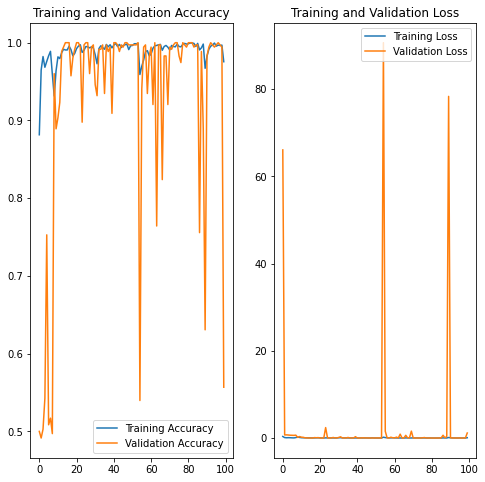

Found 1188 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
Epoch 1/100
37/37 [==============================] - 1s 38ms/step - loss: 0.7119 - accuracy: 0.7145 - val_loss: 15.8903 - val_accuracy: 0.5156
Epoch 2/100
37/37 [==============================] - 1s 36ms/step - loss: 0.7968 - accuracy: 0.6471 - val_loss: 0.8359 - val_accuracy: 0.5885
Epoch 3/100
37/37 [==============================] - 1s 37ms/step - loss: 1.0031 - accuracy: 0.5770 - val_loss: 402.0474 - val_accuracy: 0.4479
Epoch 4/100
37/37 [==============================] - 1s 37ms/step - loss: 0.8459 - accuracy: 0.5363 - val_loss: 16.7590 - val_accuracy: 0.5312
Epoch 5/100
37/37 [==============================] - 1s 36ms/step - loss: 0.7962 - accuracy: 0.6531 - val_loss: 4.6739 - val_accuracy: 0.5625
Epoch 6/100
37/37 [==============================] - 1s 36ms/step - loss: 0.6575 - accuracy: 0.6825 - val_loss: 1.5786 - val_accuracy: 0.5365
Epoch 7/100
37/37 [==============================] - 1s 37ms/

Epoch 58/100
37/37 [==============================] - 1s 36ms/step - loss: 0.1262 - accuracy: 0.9524 - val_loss: 0.3335 - val_accuracy: 0.8854
Epoch 59/100
37/37 [==============================] - 1s 36ms/step - loss: 0.1357 - accuracy: 0.9446 - val_loss: 0.4348 - val_accuracy: 0.8438
Epoch 60/100
37/37 [==============================] - 1s 35ms/step - loss: 0.1029 - accuracy: 0.9576 - val_loss: 0.3105 - val_accuracy: 0.8854
Epoch 61/100
37/37 [==============================] - 1s 35ms/step - loss: 0.2149 - accuracy: 0.9400 - val_loss: 1.3709 - val_accuracy: 0.6562
Epoch 62/100
37/37 [==============================] - 1s 36ms/step - loss: 0.2310 - accuracy: 0.9040 - val_loss: 0.4744 - val_accuracy: 0.8438
Epoch 63/100
37/37 [==============================] - 1s 36ms/step - loss: 0.1502 - accuracy: 0.9438 - val_loss: 0.6160 - val_accuracy: 0.8490
Epoch 64/100
37/37 [==============================] - 1s 35ms/step - loss: 0.1063 - accuracy: 0.9542 - val_loss: 0.4390 - val_accuracy: 0.8438

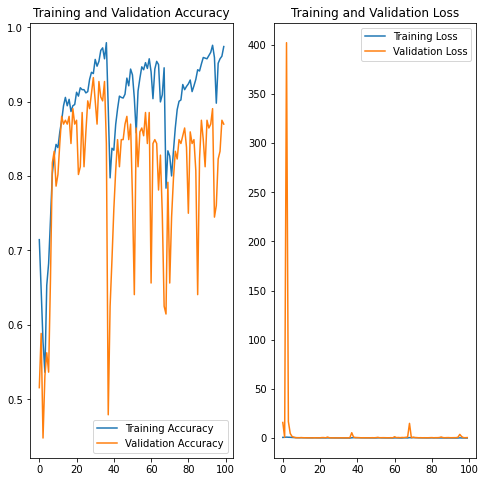

2278 374
Found 2278 images belonging to 2 classes.
Found 374 images belonging to 2 classes.
Epoch 1/100
71/71 [==============================] - 4s 54ms/step - loss: 0.4517 - accuracy: 0.8785 - val_loss: 1.5504 - val_accuracy: 0.5085
Epoch 2/100
71/71 [==============================] - 3s 35ms/step - loss: 0.1466 - accuracy: 0.9581 - val_loss: 0.7988 - val_accuracy: 0.5000
Epoch 3/100
71/71 [==============================] - 3s 36ms/step - loss: 0.0558 - accuracy: 0.9840 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 4/100
71/71 [==============================] - 3s 36ms/step - loss: 0.0576 - accuracy: 0.9795 - val_loss: 0.6842 - val_accuracy: 0.4972
Epoch 5/100
71/71 [==============================] - 3s 36ms/step - loss: 0.0953 - accuracy: 0.9711 - val_loss: 0.6522 - val_accuracy: 0.7841
Epoch 6/100
71/71 [==============================] - 3s 35ms/step - loss: 0.0726 - accuracy: 0.9795 - val_loss: 0.5308 - val_accuracy: 0.7045
Epoch 7/100
71/71 [==============================] - 2s 

Epoch 58/100
71/71 [==============================] - 2s 35ms/step - loss: 0.0060 - accuracy: 0.9982 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 59/100
71/71 [==============================] - 2s 35ms/step - loss: 0.0062 - accuracy: 0.9987 - val_loss: 0.0224 - val_accuracy: 0.9886
Epoch 60/100
71/71 [==============================] - 2s 35ms/step - loss: 0.1086 - accuracy: 0.9541 - val_loss: 3.1621 - val_accuracy: 0.5028
Epoch 61/100
71/71 [==============================] - 3s 35ms/step - loss: 0.0966 - accuracy: 0.9671 - val_loss: 0.0840 - val_accuracy: 0.9801
Epoch 62/100
71/71 [==============================] - 2s 35ms/step - loss: 0.0481 - accuracy: 0.9826 - val_loss: 0.0394 - val_accuracy: 0.9858
Epoch 63/100
71/71 [==============================] - 2s 35ms/step - loss: 0.0289 - accuracy: 0.9924 - val_loss: 0.0174 - val_accuracy: 0.9943
Epoch 64/100
71/71 [==============================] - 2s 35ms/step - loss: 0.0199 - accuracy: 0.9942 - val_loss: 0.0107 - val_accuracy: 0.9943

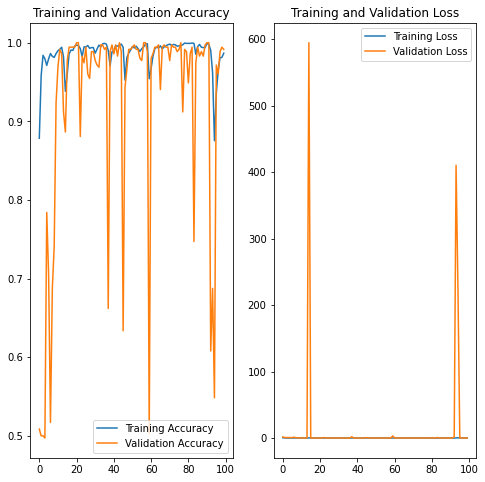

Found 1188 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
Epoch 1/100
37/37 [==============================] - 1s 38ms/step - loss: 1.0360 - accuracy: 0.7405 - val_loss: 14.7711 - val_accuracy: 0.5521
Epoch 2/100
37/37 [==============================] - 1s 35ms/step - loss: 1.0793 - accuracy: 0.7163 - val_loss: 24.8737 - val_accuracy: 0.5469
Epoch 3/100
37/37 [==============================] - 1s 36ms/step - loss: 0.7414 - accuracy: 0.7301 - val_loss: 0.6313 - val_accuracy: 0.5677
Epoch 4/100
37/37 [==============================] - 1s 36ms/step - loss: 0.6107 - accuracy: 0.7016 - val_loss: 1.6373 - val_accuracy: 0.6406
Epoch 5/100
37/37 [==============================] - 1s 36ms/step - loss: 0.4997 - accuracy: 0.7483 - val_loss: 0.9215 - val_accuracy: 0.7188
Epoch 6/100
37/37 [==============================] - 1s 36ms/step - loss: 0.5204 - accuracy: 0.7517 - val_loss: 0.6198 - val_accuracy: 0.6562
Epoch 7/100
37/37 [==============================] - 1s 36ms/st

Epoch 58/100
37/37 [==============================] - 1s 35ms/step - loss: 0.2485 - accuracy: 0.9048 - val_loss: 0.3310 - val_accuracy: 0.8594
Epoch 59/100
37/37 [==============================] - 1s 36ms/step - loss: 0.2458 - accuracy: 0.9022 - val_loss: 0.3279 - val_accuracy: 0.8490
Epoch 60/100
37/37 [==============================] - 1s 35ms/step - loss: 0.2193 - accuracy: 0.9187 - val_loss: 0.3290 - val_accuracy: 0.8594
Epoch 61/100
37/37 [==============================] - 1s 35ms/step - loss: 0.2112 - accuracy: 0.9221 - val_loss: 0.3590 - val_accuracy: 0.8594
Epoch 62/100
37/37 [==============================] - 1s 35ms/step - loss: 0.2029 - accuracy: 0.9178 - val_loss: 0.3484 - val_accuracy: 0.8594
Epoch 63/100
37/37 [==============================] - 1s 35ms/step - loss: 0.2726 - accuracy: 0.9022 - val_loss: 0.2883 - val_accuracy: 0.9062
Epoch 64/100
37/37 [==============================] - 1s 35ms/step - loss: 0.2034 - accuracy: 0.9299 - val_loss: 0.3978 - val_accuracy: 0.8281

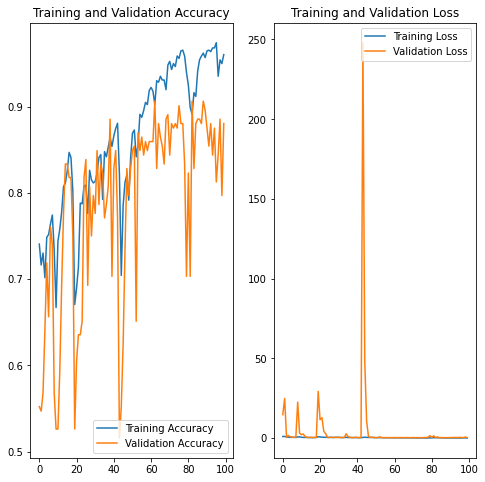

2278 374
Found 2278 images belonging to 2 classes.
Found 374 images belonging to 2 classes.
Epoch 1/100
71/71 [==============================] - 4s 59ms/step - loss: 0.3448 - accuracy: 0.8811 - val_loss: 654.4400 - val_accuracy: 0.5142
Epoch 2/100
71/71 [==============================] - 3s 36ms/step - loss: 0.2296 - accuracy: 0.9270 - val_loss: 7267.8564 - val_accuracy: 0.5114
Epoch 3/100
71/71 [==============================] - 2s 35ms/step - loss: 0.1242 - accuracy: 0.9617 - val_loss: 1.4239 - val_accuracy: 0.5000
Epoch 4/100
71/71 [==============================] - 3s 35ms/step - loss: 0.0981 - accuracy: 0.9728 - val_loss: 1.0407 - val_accuracy: 0.5028
Epoch 5/100
71/71 [==============================] - 3s 35ms/step - loss: 0.0451 - accuracy: 0.9871 - val_loss: 0.5907 - val_accuracy: 0.7727
Epoch 6/100
71/71 [==============================] - 3s 36ms/step - loss: 0.0336 - accuracy: 0.9880 - val_loss: 0.4112 - val_accuracy: 0.8466
Epoch 7/100
71/71 [==============================] 

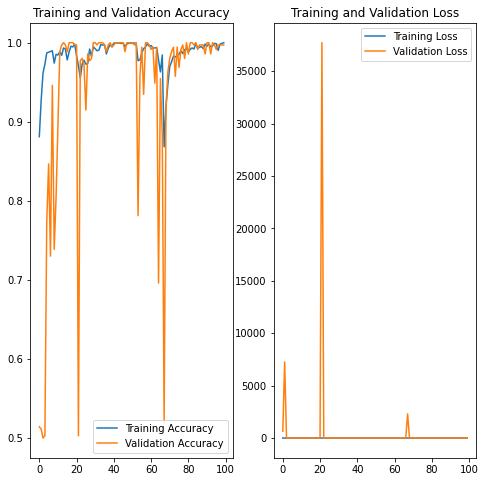

Found 1188 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
Epoch 1/100
37/37 [==============================] - 1s 39ms/step - loss: 1.1895 - accuracy: 0.6453 - val_loss: 224.9610 - val_accuracy: 0.4792
Epoch 2/100
37/37 [==============================] - 1s 37ms/step - loss: 0.6228 - accuracy: 0.6099 - val_loss: 3283.8875 - val_accuracy: 0.5156
Epoch 3/100
37/37 [==============================] - 1s 36ms/step - loss: 0.9434 - accuracy: 0.5908 - val_loss: 20556.9004 - val_accuracy: 0.5104
Epoch 4/100
37/37 [==============================] - 1s 36ms/step - loss: 0.8616 - accuracy: 0.5657 - val_loss: 110.7618 - val_accuracy: 0.5365
Epoch 5/100
37/37 [==============================] - 1s 36ms/step - loss: 0.7379 - accuracy: 0.5865 - val_loss: 845.4612 - val_accuracy: 0.4792
Epoch 6/100
37/37 [==============================] - 1s 36ms/step - loss: 0.7089 - accuracy: 0.6315 - val_loss: 98.4477 - val_accuracy: 0.4896
Epoch 7/100
37/37 [==============================] 

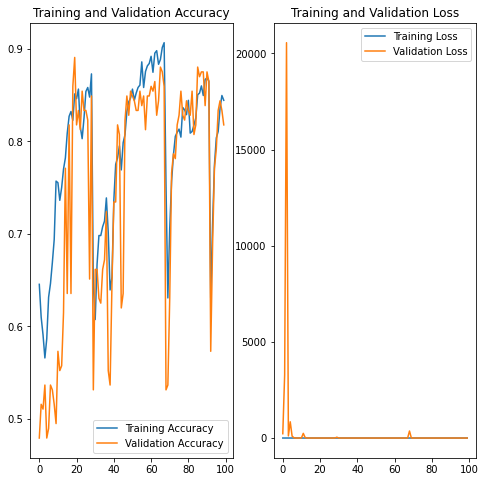

7min 17s ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


In [14]:
%%timeit -r 1 -n 10

path_train = path_base+'tr/'
path_val = path_base+'val/'

num_0_train = len(os.listdir(path_train+'0'))
num_1_train = len(os.listdir(path_train+'1'))

num_0_val = len(os.listdir(path_val+'0'))
num_1_val = len(os.listdir(path_val+'1'))

total_train = num_0_train + num_1_train
total_val = num_0_val + num_1_val

print(total_train, total_val)

# batch_size = 64
batch_size = 32
epochs = 100
IMG_HEIGHT = 32
IMG_WIDTH = 32

train_image_generator = ImageDataGenerator(rescale=1./255) # 学習データのジェネレータ
val_image_generator = ImageDataGenerator(rescale=1./255) # 検証データのジェネレータ
# predict_image_generator = ImageDataGenerator(rescale=1./255) # 予測データのジェネレータ

train_data_gen = train_image_generator.flow_from_directory(directory=path_train,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = val_image_generator.flow_from_directory(directory=path_val,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

input_tensor = Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))
base_model = tf.keras.applications.ResNet50(
    include_top=False, weights='imagenet', input_tensor=input_tensor, pooling='avg'
)

top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(1, activation='sigmoid'))


model = models.Model(inputs=base_model.input, outputs=top_model(base_model.output))

from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-3),
              metrics=['accuracy'])

# model.summary()




history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# with open('../data/acc/natural2(synthetic).txt', mode='a') as f:
#     f.write(str(val_acc[-1]) + '\n')

for l in model.layers[:-1]:
    l.trainable = False
# model.summary()

path_train = path_novel2+'tr/'
path_val = path_novel2+'val/'

num_0_train = len(os.listdir(path_train+'0'))
num_1_train = len(os.listdir(path_train+'1'))

num_0_val = len(os.listdir(path_val+'0'))
num_1_val = len(os.listdir(path_val+'1'))

total_train = num_0_train + num_1_train
total_val = num_0_val + num_1_val

train_image_generator = ImageDataGenerator(rescale=1./255) # 学習データのジェネレータ
val_image_generator = ImageDataGenerator(rescale=1./255) # 検証データのジェネレータ
# predict_image_generator = ImageDataGenerator(rescale=1./255) # 予測データのジェネレータ

train_data_gen = train_image_generator.flow_from_directory(directory=path_train,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = val_image_generator.flow_from_directory(directory=path_val,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')


history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# with open('../data/acc/natural2(natural).txt', mode='a') as f:
#     f.write(str(val_acc[-1]) + '\n')
prob.append(val_acc[-1])

In [15]:
print(np.array(prob[-20:]).mean(), np.array(prob[-20:]).max())

prob[-20:]

0.8606770783662796 0.921875


[0.84375,
 0.921875,
 0.8802083134651184,
 0.8125,
 0.84375,
 0.828125,
 0.8802083134651184,
 0.796875,
 0.875,
 0.8489583134651184,
 0.8645833134651184,
 0.8854166865348816,
 0.8645833134651184,
 0.8854166865348816,
 0.8541666865348816,
 0.8802083134651184,
 0.8802083134651184,
 0.8697916865348816,
 0.8802083134651184,
 0.8177083134651184]